# Drug features clustering according to mechanisms of action

On 2021.8.2, now I'm in a hospital because my father is sick due to cerebral infarction by sudden thrombus after about one month since the 2nd pfizer vaccination. Furthermore, by the COVID-19 pandemic situation, my father and me have been isolated from the out world. My labtop display was broken when I tested my MoA(mechanisms of action) prediction model and drug feature clustering according to mechanisms of action, so my old mother bought a new monitor and brought me the monitor because I couldn't go out. I'm writing this with the sub monitor. 

Last year, I participated in the Mechanisms of Action contest, and that time, I developed an autoencoder and additive angular margin based MoA prediction model approaching this problem as clusering, not multi-classification. Of course, I devleoped an autoencoder based model as multi-classification. I thought the clustering model will be superior to the multi-classification model because the clustering model predicted mechanisms of action more accurately in practical mechanisms of action plot graphs than the multi-classification model, but rather the multi-classification model was superior to the clustering model in the viewpoint of the metric used that time.

By the way, MoA clustering for the multi-clasification is more random than the clustering model, and in the clustering model, MoA clustering is structured and all drugs have almost all mechanisms of action. So that time, if it is valid, I thought the mRNA vaccine can have almost all known mechanisms of action. But I needed verification.

Vaccination is mandatory, but our family and friend can die or have serious side effects due to unstable vaccines. Maybe, I hoped fortune for vaccination to my family. But fortune is only a fortune word to me. 

After I faced my father's accident, I searched for relevant papers, and I got it.
Refer to https://www.medrxiv.org/content/10.1101/2021.04.30.21256383v1.
This paper shows the vaccine induced immune thrombotic thrombocytopenia side effect for the BNT162b2, ChAdOx1 vaccines. So I understood my father accident's reason.

Moreover, I'm confident that the MoA clusering model is valid.
For mRNA vaccines, the vaccination can be carried out to children <= 13. It can be terrible in the human history, because mRNA vaccines' stability are almost unknown.
Refer to https://coronavirus.quora.com/?__ni__=0&__nsrc__=4&__snid3__=24261290897&__tiids__=32992518

I still think that the mRNA vaccine is only a solution to cope with fastly changing variants and mutants. But their stability is also mandatory as like that vaccination is mandatory, and this solution must be developed very fastly as the vaccination effect development.

Via MoA prediction, we can identify side effects of vaccines and develop more stable vaccines. It is mandatory.

## Data analysis

In [1]:
%pylab inline
import pandas as pd
import seaborn as sns
import os, sys

Populating the interactive namespace from numpy and matplotlib


In [2]:
from scipy.special import comb
from itertools import combinations
import json
from tqdm import tqdm
import pdb
import plotly.express as px

In [3]:
raw_data_path = '/kaggle/input/lish-moa'

### Convert categorical values into categorical indexes

In [4]:
input_df = pd.read_csv(os.path.join(raw_data_path, 'train_features.csv'))
input_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23814 entries, 0 to 23813
Columns: 876 entries, sig_id to c-99
dtypes: float64(872), int64(1), object(3)
memory usage: 159.2+ MB


In [5]:
input_df.columns

Index(['sig_id', 'cp_type', 'cp_time', 'cp_dose', 'g-0', 'g-1', 'g-2', 'g-3',
       'g-4', 'g-5',
       ...
       'c-90', 'c-91', 'c-92', 'c-93', 'c-94', 'c-95', 'c-96', 'c-97', 'c-98',
       'c-99'],
      dtype='object', length=876)

In [6]:
len(input_df.sig_id), len(input_df.sig_id.unique())

(23814, 23814)

In [7]:
input_df.cp_type.unique(), input_df.cp_time.unique(), input_df.cp_dose.unique() 

(array(['trt_cp', 'ctl_vehicle'], dtype=object),
 array([24, 72, 48]),
 array(['D1', 'D2'], dtype=object))

In [8]:
input_df.cp_time.value_counts()

48    8250
72    7792
24    7772
Name: cp_time, dtype: int64

In [9]:
res = input_df.cp_type.astype('category')
res

0             trt_cp
1             trt_cp
2             trt_cp
3             trt_cp
4             trt_cp
            ...     
23809         trt_cp
23810         trt_cp
23811    ctl_vehicle
23812         trt_cp
23813         trt_cp
Name: cp_type, Length: 23814, dtype: category
Categories (2, object): ['ctl_vehicle', 'trt_cp']

In [10]:
len(res.cat.categories)

2

In [11]:
res = res.cat.rename_categories(range(len(res.cat.categories)))
res

0        1
1        1
2        1
3        1
4        1
        ..
23809    1
23810    1
23811    0
23812    1
23813    1
Name: cp_type, Length: 23814, dtype: category
Categories (2, int64): [0, 1]

In [12]:
res2 = res.map(lambda x: int(x))
res2

0        1
1        1
2        1
3        1
4        1
        ..
23809    1
23810    1
23811    0
23812    1
23813    1
Name: cp_type, Length: 23814, dtype: category
Categories (2, int64): [0, 1]

In [13]:
type(res2.iloc[0])

numpy.int64

In [14]:
input_df.cp_type

0             trt_cp
1             trt_cp
2             trt_cp
3             trt_cp
4             trt_cp
            ...     
23809         trt_cp
23810         trt_cp
23811    ctl_vehicle
23812         trt_cp
23813         trt_cp
Name: cp_type, Length: 23814, dtype: object

In [15]:
input_df.cp_type = input_df.cp_type.astype('category')
input_df.cp_type

0             trt_cp
1             trt_cp
2             trt_cp
3             trt_cp
4             trt_cp
            ...     
23809         trt_cp
23810         trt_cp
23811    ctl_vehicle
23812         trt_cp
23813         trt_cp
Name: cp_type, Length: 23814, dtype: category
Categories (2, object): ['ctl_vehicle', 'trt_cp']

In [16]:
input_df.cp_type = input_df.cp_type.cat.rename_categories(range(len(input_df.cp_type.cat.categories)))
input_df.cp_type

0        1
1        1
2        1
3        1
4        1
        ..
23809    1
23810    1
23811    0
23812    1
23813    1
Name: cp_type, Length: 23814, dtype: category
Categories (2, int64): [0, 1]

In [17]:
cp_v_index_series = input_df.cp_type[input_df.cp_type == 0]
cp_v_index_series 

25       0
38       0
40       0
47       0
63       0
        ..
23729    0
23747    0
23768    0
23793    0
23811    0
Name: cp_type, Length: 1866, dtype: category
Categories (2, int64): [0, 1]

In [18]:
input_df.cp_time = input_df.cp_time.astype('category')
input_df.cp_time = input_df.cp_time.cat.rename_categories(range(len(input_df.cp_time.cat.categories)))
input_df.cp_dose = input_df.cp_dose.astype('category')
input_df.cp_dose = input_df.cp_dose.cat.rename_categories(range(len(input_df.cp_dose.cat.categories)))

In [19]:
len(input_df.cp_time.cat.categories), len(input_df.cp_dose.cat.categories)

(3, 2)

In [20]:
input_df[['cp_type', 'cp_time', 'cp_dose']].head(3)

,cp_type,cp_time,cp_dose
0,1,0,0
1,1,2,0
2,1,1,0


In [21]:
res = input_df.isna().any()

In [22]:
res.any()

False

In [23]:
res = input_df.iloc[0:64]

In [24]:
res2 = res['cp_time'].values
type(res2)

pandas.core.arrays.categorical.Categorical

In [25]:
res2.to_numpy()

array([0, 2, 1, 1, 2, 0, 0, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 0, 2, 1, 1, 1,
       2, 2, 2, 1, 2, 1, 1, 2, 2, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 2, 2, 1, 0, 1, 2, 0, 1, 1, 0, 1, 0, 0, 1, 2, 1, 0, 0, 0])

In [26]:
g_feature_names = ['g-' + str(v) for v in range(772)]

In [27]:
res2 = res[g_feature_names].values
res2.shape

(64, 772)

In [28]:
res2

array([[ 1.062 ,  0.5577, -0.2479, ...,  1.649 ,  0.2968, -0.0224],
       [ 0.0743,  0.4087,  0.2991, ..., -0.334 , -0.3289, -0.2718],
       [ 0.628 ,  0.5817,  1.554 , ...,  0.3143,  0.8133,  0.7923],
       ...,
       [-0.4609, -0.441 , -0.3745, ..., -0.4072, -0.3034, -0.3269],
       [-1.398 , -0.3277, -0.2602, ..., -0.5946,  0.922 ,  0.7686],
       [ 0.4471, -0.0839, -0.3864, ..., -0.2084,  0.7128,  0.0337]])

In [29]:
res2 = res['sig_id'].values

In [30]:
type(res2), res2.shape

(numpy.ndarray, (64,))

In [31]:
res2

array(['id_000644bb2', 'id_000779bfc', 'id_000a6266a', 'id_0015fd391',
       'id_001626bd3', 'id_001762a82', 'id_001bd861f', 'id_0020d0484',
       'id_00224bf20', 'id_0023f063e', 'id_002452c7e', 'id_0024bcd70',
       'id_0025c5949', 'id_00289dc6e', 'id_002d31e2c', 'id_002e08ff8',
       'id_002fb9c19', 'id_0031dd989', 'id_003603254', 'id_0036b0342',
       'id_0039a2ff9', 'id_003b43239', 'id_003d4b6f0', 'id_003fdd734',
       'id_00505b3c8', 'id_0054388ec', 'id_00548fd5c', 'id_00578737a',
       'id_005c3cb48', 'id_005c3ee1a', 'id_0062bfc63', 'id_0063cd461',
       'id_006e27d96', 'id_006f253ab', 'id_006f6dbd6', 'id_0070c63e7',
       'id_00762e877', 'id_0077e36b9', 'id_0079af0fb', 'id_0079d45d3',
       'id_007bfbb91', 'id_0080f169f', 'id_00816e002', 'id_00849b0f8',
       'id_00872d938', 'id_0089590d4', 'id_008a18cef', 'id_008a986b7',
       'id_008b48693', 'id_008c40337', 'id_008dfb160', 'id_008f35497',
       'id_008f5b224', 'id_0090da7e9', 'id_009140ea3', 'id_0092c905e',
      

### Gene expression and cell viability

In [32]:
input_vals = input_df.values
input_vals.shape

(23814, 876)

In [33]:
input_vals[0]

array(['id_000644bb2', 1, 0, 0, 1.062, 0.5577, -0.2479, -0.6208, -0.1944,
       -1.012, -1.022, -0.0326, 0.5548, -0.0921, 1.183, 0.153, 0.5574,
       -0.4015, 0.1789, -0.6528, -0.7969, 0.6342, 0.1778, -0.3694,
       -0.5688, -1.136, -1.188, 0.694, 0.4393, 0.2664, 0.1907, 0.1628,
       -0.2853, 0.5819, 0.2934, -0.5584, -0.0916, -0.301, -0.1537, 0.2198,
       0.2965, -0.5055, -0.5119, -0.2162, -0.0347, -0.2566, -1.198,
       0.3116, -1.033, 0.2208, -0.1143, -0.0251, 0.035, 0.4233, -0.1221,
       -0.4927, 0.6119, 0.4715, -0.0351, -0.1605, -0.675, 0.2263, 0.579,
       0.9588, 0.6061, -0.13, 0.6611, -0.3136, -0.202, 0.0251, 0.167,
       -0.4195, 0.6551, -0.7395, -0.7047, -0.5369, 0.0314, -0.5239,
       -0.3406, -0.6332, -1.033, -0.3763, -0.855, 0.7348, -0.2226,
       -0.1959, -0.0005, -2.144, 1.732, 0.019, -0.1188, 0.405, -1.584,
       -0.3011, 0.2048, -1.123, -1.559, -1.798, 0.7017, -1.039, 0.0958,
       0.4527, 0.5455, -0.0828, -0.5364, 0.5522, -0.7768, -0.8044,
       -0.118

In [34]:
input_vals_p = input_vals[:, 4:]
input_vals_p.shape

(23814, 872)

In [35]:
input_vals_p = input_vals_p.astype('float32')

In [36]:
input_vals_p.shape, input_vals_p.dtype

((23814, 872), dtype('float32'))

In [37]:
input_vals_p[0, ...]

array([ 1.062e+00,  5.577e-01, -2.479e-01, -6.208e-01, -1.944e-01,
       -1.012e+00, -1.022e+00, -3.260e-02,  5.548e-01, -9.210e-02,
        1.183e+00,  1.530e-01,  5.574e-01, -4.015e-01,  1.789e-01,
       -6.528e-01, -7.969e-01,  6.342e-01,  1.778e-01, -3.694e-01,
       -5.688e-01, -1.136e+00, -1.188e+00,  6.940e-01,  4.393e-01,
        2.664e-01,  1.907e-01,  1.628e-01, -2.853e-01,  5.819e-01,
        2.934e-01, -5.584e-01, -9.160e-02, -3.010e-01, -1.537e-01,
        2.198e-01,  2.965e-01, -5.055e-01, -5.119e-01, -2.162e-01,
       -3.470e-02, -2.566e-01, -1.198e+00,  3.116e-01, -1.033e+00,
        2.208e-01, -1.143e-01, -2.510e-02,  3.500e-02,  4.233e-01,
       -1.221e-01, -4.927e-01,  6.119e-01,  4.715e-01, -3.510e-02,
       -1.605e-01, -6.750e-01,  2.263e-01,  5.790e-01,  9.588e-01,
        6.061e-01, -1.300e-01,  6.611e-01, -3.136e-01, -2.020e-01,
        2.510e-02,  1.670e-01, -4.195e-01,  6.551e-01, -7.395e-01,
       -7.047e-01, -5.369e-01,  3.140e-02, -5.239e-01, -3.406e

In [38]:
ge_val = input_vals_p[:, 0:772]
ct_val = input_vals_p[:, 772:]
ge_val.shape, ct_val.shape

((23814, 772), (23814, 100))

In [39]:
ge_val_mean = ge_val.mean(axis=-1)
ge_val_std = ge_val.std(axis=-1)
ge_val_mean.shape

(23814,)

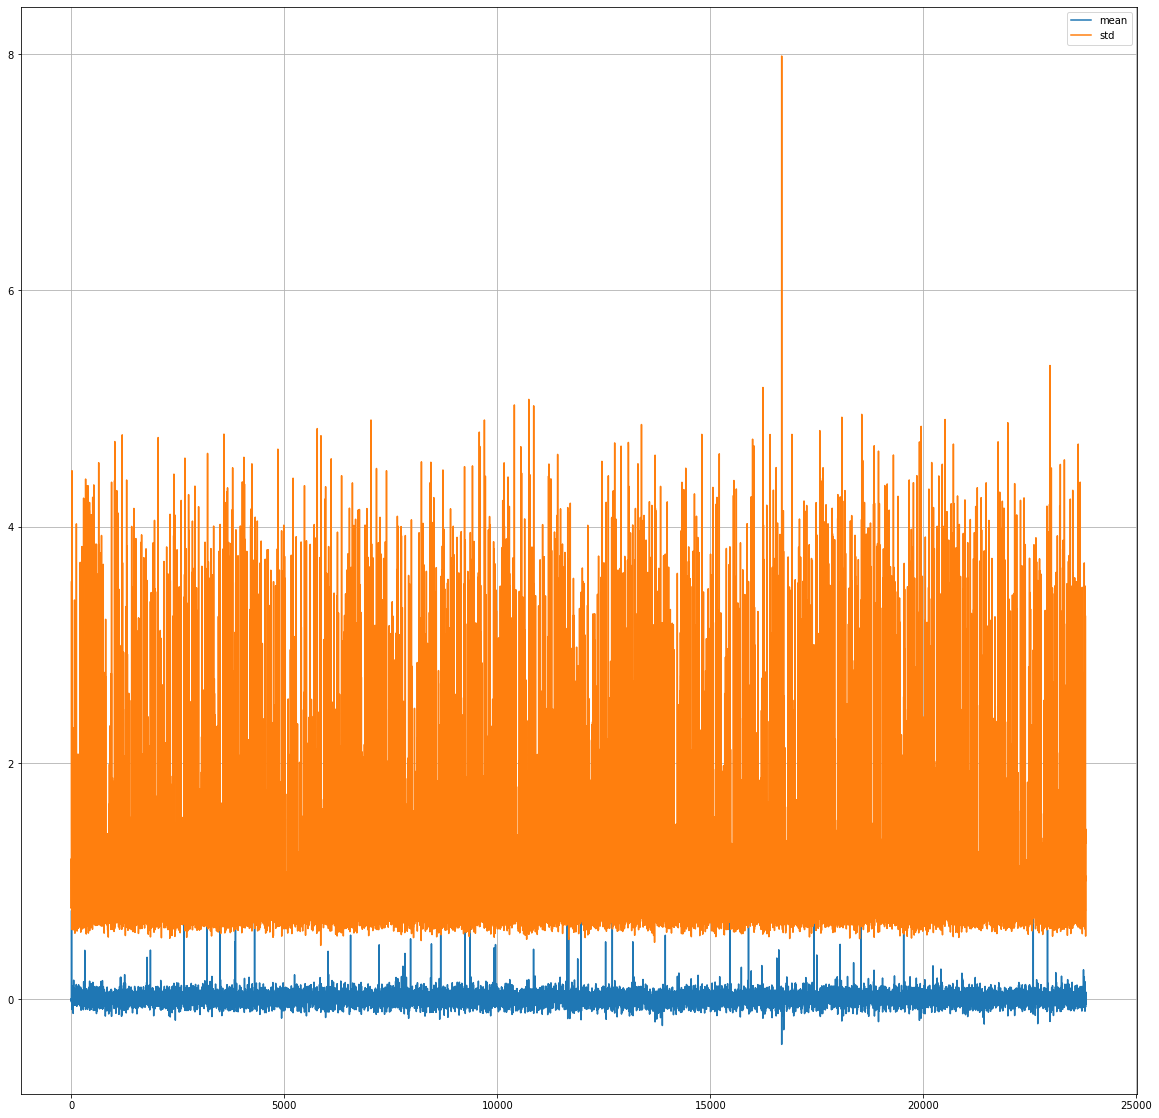

In [40]:
figure(figsize=(20, 20))
plot(ge_val_mean, label='mean')
plot(ge_val_std, label='std')
legend()
grid()

In [41]:
ct_val_mean = ct_val.mean(axis=-1)
ct_val_std = ct_val.std(axis=-1)

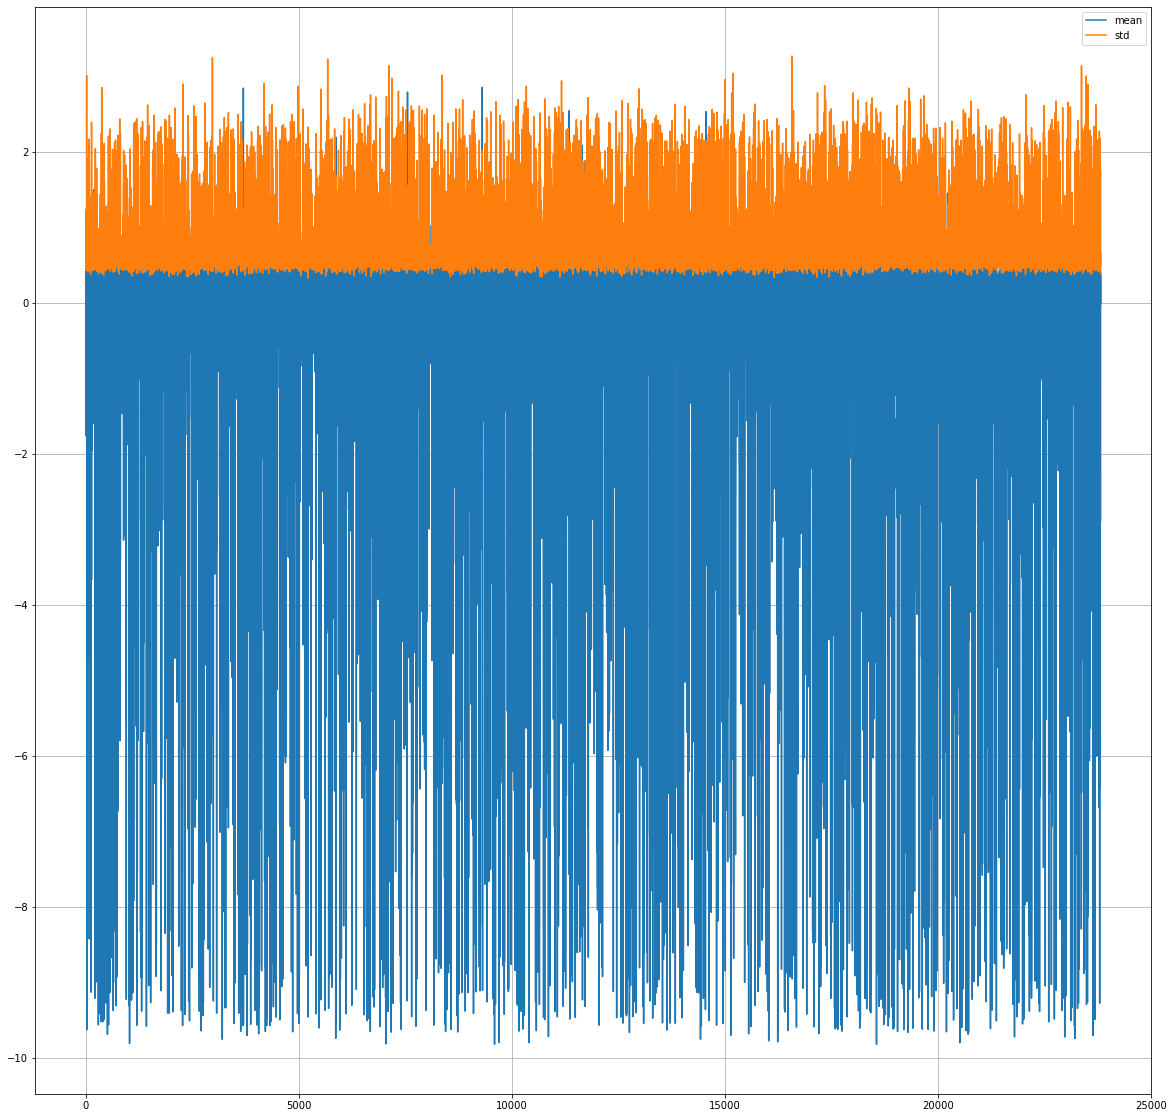

In [42]:
figure(figsize=(20, 20))
plot(ct_val_mean, label='mean')
plot(ct_val_std, label='std')
legend()
grid()

### Target feature

In [43]:
target_scored_df = pd.read_csv(os.path.join(raw_data_path, 'train_targets_scored.csv'))
target_scored_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23814 entries, 0 to 23813
Columns: 207 entries, sig_id to wnt_inhibitor
dtypes: int64(206), object(1)
memory usage: 37.6+ MB


In [44]:
target_scored_df.columns

Index(['sig_id', '5-alpha_reductase_inhibitor', '11-beta-hsd1_inhibitor',
       'acat_inhibitor', 'acetylcholine_receptor_agonist',
       'acetylcholine_receptor_antagonist', 'acetylcholinesterase_inhibitor',
       'adenosine_receptor_agonist', 'adenosine_receptor_antagonist',
       'adenylyl_cyclase_activator',
       ...
       'tropomyosin_receptor_kinase_inhibitor', 'trpv_agonist',
       'trpv_antagonist', 'tubulin_inhibitor', 'tyrosine_kinase_inhibitor',
       'ubiquitin_specific_protease_inhibitor', 'vegfr_inhibitor', 'vitamin_b',
       'vitamin_d_receptor_agonist', 'wnt_inhibitor'],
      dtype='object', length=207)

In [45]:
moa_names = list(target_scored_df.columns)[1:]
moa_names

['5-alpha_reductase_inhibitor',
 '11-beta-hsd1_inhibitor',
 'acat_inhibitor',
 'acetylcholine_receptor_agonist',
 'acetylcholine_receptor_antagonist',
 'acetylcholinesterase_inhibitor',
 'adenosine_receptor_agonist',
 'adenosine_receptor_antagonist',
 'adenylyl_cyclase_activator',
 'adrenergic_receptor_agonist',
 'adrenergic_receptor_antagonist',
 'akt_inhibitor',
 'aldehyde_dehydrogenase_inhibitor',
 'alk_inhibitor',
 'ampk_activator',
 'analgesic',
 'androgen_receptor_agonist',
 'androgen_receptor_antagonist',
 'anesthetic_-_local',
 'angiogenesis_inhibitor',
 'angiotensin_receptor_antagonist',
 'anti-inflammatory',
 'antiarrhythmic',
 'antibiotic',
 'anticonvulsant',
 'antifungal',
 'antihistamine',
 'antimalarial',
 'antioxidant',
 'antiprotozoal',
 'antiviral',
 'apoptosis_stimulant',
 'aromatase_inhibitor',
 'atm_kinase_inhibitor',
 'atp-sensitive_potassium_channel_antagonist',
 'atp_synthase_inhibitor',
 'atpase_inhibitor',
 'atr_kinase_inhibitor',
 'aurora_kinase_inhibitor',
 '

In [46]:
target_scored_df.sum(axis=1)

0        1
1        0
2        3
3        0
4        1
        ..
23809    1
23810    1
23811    0
23812    1
23813    0
Length: 23814, dtype: int64

In [47]:
res = target_scored_df[input_df.cp_type == 0]
res

,sig_id,5-alpha_reductase_inhibitor,11-beta-hsd1_inhibitor,acat_inhibitor,acetylcholine_receptor_agonist,acetylcholine_receptor_antagonist,acetylcholinesterase_inhibitor,adenosine_receptor_agonist,adenosine_receptor_antagonist,adenylyl_cyclase_activator,...,tropomyosin_receptor_kinase_inhibitor,trpv_agonist,trpv_antagonist,tubulin_inhibitor,tyrosine_kinase_inhibitor,ubiquitin_specific_protease_inhibitor,vegfr_inhibitor,vitamin_b,vitamin_d_receptor_agonist,wnt_inhibitor
25,id_0054388ec,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
38,id_0079af0fb,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
40,id_007bfbb91,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
47,id_008a986b7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
63,id_009d8340f,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23729,id_ff1f9e5fc,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
23747,id_ff469c482,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
23768,id_ff89331ca,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
23793,id_ffd26f361,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [48]:
res.sum(axis=1)

25       0
38       0
40       0
47       0
63       0
        ..
23729    0
23747    0
23768    0
23793    0
23811    0
Length: 1866, dtype: int64

In [49]:
target_scored_df

,sig_id,5-alpha_reductase_inhibitor,11-beta-hsd1_inhibitor,acat_inhibitor,acetylcholine_receptor_agonist,acetylcholine_receptor_antagonist,acetylcholinesterase_inhibitor,adenosine_receptor_agonist,adenosine_receptor_antagonist,adenylyl_cyclase_activator,...,tropomyosin_receptor_kinase_inhibitor,trpv_agonist,trpv_antagonist,tubulin_inhibitor,tyrosine_kinase_inhibitor,ubiquitin_specific_protease_inhibitor,vegfr_inhibitor,vitamin_b,vitamin_d_receptor_agonist,wnt_inhibitor
0,id_000644bb2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,id_000779bfc,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,id_000a6266a,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,id_0015fd391,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,id_001626bd3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23809,id_fffb1ceed,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
23810,id_fffb70c0c,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
23811,id_fffc1c3f4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
23812,id_fffcb9e7c,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [50]:
target_nonscored_df = pd.read_csv(os.path.join(raw_data_path, 'train_targets_nonscored.csv'))
target_nonscored_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23814 entries, 0 to 23813
Columns: 403 entries, sig_id to xiap_inhibitor
dtypes: int64(402), object(1)
memory usage: 73.2+ MB


In [51]:
target_nonscored_df.columns

Index(['sig_id', 'abc_transporter_expression_enhancer', 'abl_inhibitor',
       'ace_inhibitor', 'acetylcholine_release_enhancer',
       'adenosine_deaminase_inhibitor', 'adenosine_kinase_inhibitor',
       'adenylyl_cyclase_inhibitor', 'age_inhibitor',
       'alcohol_dehydrogenase_inhibitor',
       ...
       've-cadherin_antagonist', 'vesicular_monoamine_transporter_inhibitor',
       'vitamin_k_antagonist', 'voltage-gated_calcium_channel_ligand',
       'voltage-gated_potassium_channel_activator',
       'voltage-gated_sodium_channel_blocker',
       'wdr5_mll_interaction_inhibitor', 'wnt_agonist',
       'xanthine_oxidase_inhibitor', 'xiap_inhibitor'],
      dtype='object', length=403)

In [52]:
target_df = pd.concat([target_scored_df, target_nonscored_df.iloc[:, 1:]], axis=1)
len(target_df.columns)

609

In [53]:
target_df

,sig_id,5-alpha_reductase_inhibitor,11-beta-hsd1_inhibitor,acat_inhibitor,acetylcholine_receptor_agonist,acetylcholine_receptor_antagonist,acetylcholinesterase_inhibitor,adenosine_receptor_agonist,adenosine_receptor_antagonist,adenylyl_cyclase_activator,...,ve-cadherin_antagonist,vesicular_monoamine_transporter_inhibitor,vitamin_k_antagonist,voltage-gated_calcium_channel_ligand,voltage-gated_potassium_channel_activator,voltage-gated_sodium_channel_blocker,wdr5_mll_interaction_inhibitor,wnt_agonist,xanthine_oxidase_inhibitor,xiap_inhibitor
0,id_000644bb2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,id_000779bfc,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,id_000a6266a,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,id_0015fd391,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,id_001626bd3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23809,id_fffb1ceed,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
23810,id_fffb70c0c,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
23811,id_fffc1c3f4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
23812,id_fffcb9e7c,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [54]:
target_df.columns

Index(['sig_id', '5-alpha_reductase_inhibitor', '11-beta-hsd1_inhibitor',
       'acat_inhibitor', 'acetylcholine_receptor_agonist',
       'acetylcholine_receptor_antagonist', 'acetylcholinesterase_inhibitor',
       'adenosine_receptor_agonist', 'adenosine_receptor_antagonist',
       'adenylyl_cyclase_activator',
       ...
       've-cadherin_antagonist', 'vesicular_monoamine_transporter_inhibitor',
       'vitamin_k_antagonist', 'voltage-gated_calcium_channel_ligand',
       'voltage-gated_potassium_channel_activator',
       'voltage-gated_sodium_channel_blocker',
       'wdr5_mll_interaction_inhibitor', 'wnt_agonist',
       'xanthine_oxidase_inhibitor', 'xiap_inhibitor'],
      dtype='object', length=609)

In [55]:
res = target_nonscored_df.sum()
res

sig_id                                  id_000644bb2id_000779bfcid_000a6266aid_0015fd3...
abc_transporter_expression_enhancer                                                     6
abl_inhibitor                                                                          24
ace_inhibitor                                                                          91
acetylcholine_release_enhancer                                                          6
                                                              ...                        
voltage-gated_sodium_channel_blocker                                                   18
wdr5_mll_interaction_inhibitor                                                          6
wnt_agonist                                                                             0
xanthine_oxidase_inhibitor                                                             24
xiap_inhibitor                                                                         24
Length: 40

In [56]:
target_scored_df.iloc[:, 1:2].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23814 entries, 0 to 23813
Data columns (total 1 columns):
 #   Column                       Non-Null Count  Dtype
---  ------                       --------------  -----
 0   5-alpha_reductase_inhibitor  23814 non-null  int64
dtypes: int64(1)
memory usage: 186.2 KB


In [57]:
type(target_scored_df.iloc[:, 1:2])

pandas.core.frame.DataFrame

In [58]:
target_scored_df.iloc[:, 1:2].iloc[:, 0].value_counts()

0    23797
1       17
Name: 5-alpha_reductase_inhibitor, dtype: int64

In [59]:
for i in range(1, len(target_scored_df.columns)):
    print(i, target_scored_df.iloc[:, i:(i+1)].iloc[:, 0].value_counts())

1 0    23797
1       17
Name: 5-alpha_reductase_inhibitor, dtype: int64
2 0    23796
1       18
Name: 11-beta-hsd1_inhibitor, dtype: int64
3 0    23790
1       24
Name: acat_inhibitor, dtype: int64
4 0    23624
1      190
Name: acetylcholine_receptor_agonist, dtype: int64
5 0    23513
1      301
Name: acetylcholine_receptor_antagonist, dtype: int64
6 0    23741
1       73
Name: acetylcholinesterase_inhibitor, dtype: int64
7 0    23760
1       54
Name: adenosine_receptor_agonist, dtype: int64
8 0    23718
1       96
Name: adenosine_receptor_antagonist, dtype: int64
9 0    23802
1       12
Name: adenylyl_cyclase_activator, dtype: int64
10 0    23544
1      270
Name: adrenergic_receptor_agonist, dtype: int64
11 0    23454
1      360
Name: adrenergic_receptor_antagonist, dtype: int64
12 0    23748
1       66
Name: akt_inhibitor, dtype: int64
13 0    23807
1        7
Name: aldehyde_dehydrogenase_inhibitor, dtype: int64
14 0    23772
1       42
Name: alk_inhibitor, dtype: int64
15 0    23802

In [60]:
target_scored_df.columns[1:]

Index(['5-alpha_reductase_inhibitor', '11-beta-hsd1_inhibitor',
       'acat_inhibitor', 'acetylcholine_receptor_agonist',
       'acetylcholine_receptor_antagonist', 'acetylcholinesterase_inhibitor',
       'adenosine_receptor_agonist', 'adenosine_receptor_antagonist',
       'adenylyl_cyclase_activator', 'adrenergic_receptor_agonist',
       ...
       'tropomyosin_receptor_kinase_inhibitor', 'trpv_agonist',
       'trpv_antagonist', 'tubulin_inhibitor', 'tyrosine_kinase_inhibitor',
       'ubiquitin_specific_protease_inhibitor', 'vegfr_inhibitor', 'vitamin_b',
       'vitamin_d_receptor_agonist', 'wnt_inhibitor'],
      dtype='object', length=206)

In [61]:
len(target_scored_df.columns[1:])

206

## MoA prediction model

In [62]:
!rm -rf keras_unsupervised

In [63]:
!git clone https://github.com/tonandr/keras_unsupervised.git

Cloning into 'keras_unsupervised'...
remote: Enumerating objects: 1234, done.
remote: Counting objects: 100% (308/308), done.
remote: Compressing objects: 100% (231/231), done.
remote: Total 1234 (delta 190), reused 178 (delta 74), pack-reused 926
Receiving objects: 100% (1234/1234), 8.74 MiB | 10.78 MiB/s, done.
Resolving deltas: 100% (699/699), done.


In [64]:
cd keras_unsupervised

/kaggle/working/keras_unsupervised


In [65]:
%%writefile setup.py
"""Keras unsupervised setup module.
"""

from setuptools import setup, find_packages
from os import path
from io import open

here = path.abspath(path.dirname(__file__))

# Get the long description from the README file
with open(path.join(here, 'README.md'), encoding='utf-8') as f:
    long_description = f.read()

setup(
    name='keras-unsupervised',  # Required
    version='1.1.3.dev1',  # Required
    description='Keras based unsupervised learning framework.',  # Optional
    long_description=long_description,  # Optional
    long_description_content_type='text/markdown',  # Optional (see note above)
    url='https://github.com/tonandr/keras_unsupervised',  # Optional
    author='Inwoo Chung',  # Optional
    author_email='gutomitai@gmail.com',  # Optional

    classifiers=[  # Optional
        # How mature is this project? Common values are
        #   3 - Alpha
        #   4 - Beta
        #   5 - Production/Stable
        'Development Status :: 4 - Beta',

        # Indicate who your project is intended for
        'Intended Audience :: Developers',
        'Intended Audience :: Science/Research',
        #'Software Development :: Libraries',

        # Pick your license as you wish
        'License :: OSI Approved :: BSD License',

        # Specify the Python versions you support here. In particular, ensure
        # that you indicate whether you support Python 2, Python 3 or both.
        # These classifiers are *not* checked by 'pip install'. See instead
        # 'python_requires' below.
        'Programming Language :: Python :: 3',
        'Programming Language :: Python :: 3.7'
        'Programming Language :: Python :: 3.8'
    ],

    # This field adds keywords for your project which will appear on the
    # project page. What does your project relate to?
    #
    # Note that this is a string of words separated by whitespace, not a list.
    keywords='keras deepleaning unsupervised semisupervised restricted-botlzmann-machine deep-belief-network autoencoder generative-adversarial-networks',  # Optional

    # You can just specify package directories manually here if your project is
    # simple. Or you can use find_packages().
    #
    # Alternatively, if you just want to distribute a single Python file, use
    # the `py_modules` argument instead as follows, which will expect a file
    # called `my_module.py` to exist:
    #
    #   py_modules=["my_module"],
    #
    packages=find_packages(exclude=['analysis', 'docs', 'docs_mkdocs', 'resource']),  # Required

    # This field lists other packages that your project depends on to run.
    # Any package you put here will be installed by pip when your project is
    # installed, so they must be valid existing projects.
    #
    # For an analysis of "install_requires" vs pip's requirements files see:
    # https://packaging.python.org/en/latest/requirements.html
    install_requires=['tensorflow-probability==0.11'
                      , 'pandas'
                      , 'scikit-image'
                      , 'matplotlib'
                      , 'opencv-contrib-python'],  # Optional

    # Specify which Python versions you support. In contrast to the
    # 'Programming Language' classifiers above, 'pip install' will check this
    # and refuse to install the project if the version does not match. If you
    # do not support Python 2, you can simplify this to '>=3.5' or similar, see
    # https://packaging.python.org/guides/distributing-packages-using-setuptools/#python-requires
    python_requires='<=3.8',

    # List additional groups of dependencies here (e.g. development
    # dependencies). Users will be able to install these using the "extras"
    # syntax, for example:
    #
    #   $ pip install sampleproject[dev]
    #
    # Similar to `install_requires` above, these must be valid existing
    # projects.
    #extras_require={  # Optional
    #    'dev': ['check-manifest'],
    #    'test': ['coverage'],
    #},

    # If there are data files included in your packages that need to be
    # installed, specify them here.
    #
    # If using Python 2.6 or earlier, then these have to be included in
    # MANIFEST.in as well.
    #package_data={  # Optional
    #    'sample': ['package_data.dat'],
    #},

    # Although 'package_data' is the preferred approach, in some case you may
    # need to place data files outside of your packages. See:
    # http://docs.python.org/3.4/distutils/setupscript.html#installing-additional-files
    #
    # In this case, 'data_file' will be installed into '<sys.prefix>/my_data'
    #data_files=[('my_data', ['data/data_file'])],  # Optional

    # To provide executable scripts, use entry points in preference to the
    # "scripts" keyword. Entry points provide cross-platform support and allow
    # `pip` to create the appropriate form of executable for the target
    # platform.
    #
    # For example, the following would provide a command called `sample` which
    # executes the function `main` from this package when invoked:
    #entry_points={  # Optional
    #    'console_scripts': [
    #        'sample=sample:main',
    #    ],
    #},

    # List additional URLs that are relevant to your project as a dict.
    #
    # This field corresponds to the "Project-URL" metadata fields:
    # https://packaging.python.org/specifications/core-metadata/#project-url-multiple-use
    #
    # Examples listed include a pattern for specifying where the package tracks
    # issues, where the source is hosted, where to say thanks to the package
    # maintainers, and where to support the project financially. The key is
    # what's used to render the link text on PyPI.
    project_urls={  # Optional
        'Bug Reports': 'https://github.com/tonandr/keras_unsupervised/issues',
        'Source': 'https://github.com/tonandr/keras_unsupervised/',
    },
)

Overwriting setup.py


In [66]:
!python setup.py sdist bdist_wheel
!pip install -e ./

running sdist
running egg_info
creating keras_unsupervised.egg-info
writing keras_unsupervised.egg-info/PKG-INFO
writing dependency_links to keras_unsupervised.egg-info/dependency_links.txt
writing requirements to keras_unsupervised.egg-info/requires.txt
writing top-level names to keras_unsupervised.egg-info/top_level.txt
writing manifest file 'keras_unsupervised.egg-info/SOURCES.txt'
writing manifest file 'keras_unsupervised.egg-info/SOURCES.txt'
running check
creating keras-unsupervised-1.1.3.dev1
creating keras-unsupervised-1.1.3.dev1/.github
creating keras-unsupervised-1.1.3.dev1/.github/workflows
creating keras-unsupervised-1.1.3.dev1/analysis
creating keras-unsupervised-1.1.3.dev1/docs
creating keras-unsupervised-1.1.3.dev1/docs/build
creating keras-unsupervised-1.1.3.dev1/docs/build/doctrees
creating keras-unsupervised-1.1.3.dev1/docs/build/html
creating keras-unsupervised-1.1.3.dev1/docs/build/html/_sources
creating keras-unsupervised-1.1.3.dev1/docs/build/html/_static
creating

In [67]:
cd ..

/kaggle/working


In [68]:
import sys

In [69]:
sys.path.append('/kaggle/working/keras_unsupervised')

In [70]:
'''
Created on Oct 8, 2020
@author: Inwoo Chung (gutomitai@gmail.com)
'''

import os
import time
import json
import random
from random import shuffle
import ctypes

#ctypes.WinDLL('cudart64_110.dll') #?

import numpy as np
import pandas as pd
from tqdm import tqdm
from sklearn.model_selection import StratifiedKFold

import tensorflow as tf
import tensorflow.keras as keras
from tensorflow.keras import backend as K
from tensorflow.keras.losses import Loss
from tensorflow.keras.metrics import Metric
from tensorflow.keras.models import Model, load_model
from tensorflow.keras.layers import Input, Conv1D, Dense, Concatenate, Dropout
from tensorflow.keras.layers import LSTM, Bidirectional, BatchNormalization, LayerNormalization
from tensorflow.keras.layers import Embedding, Layer
from tensorflow.keras import optimizers
from tensorflow.keras.callbacks import (TensorBoard
    , ReduceLROnPlateau
    , LearningRateScheduler
    , ModelCheckpoint
    , EarlyStopping)
from tensorflow.keras.constraints import UnitNorm
from tensorflow.keras.initializers import RandomUniform, TruncatedNormal
from tensorflow.keras import regularizers

from ku.composite_layer import DenseBatchNormalization
from ku.backprop import (make_decoder_from_encoder
    , make_autoencoder_from_encoder
    , make_autoencoder_with_sym_sc)

# os.environ["CUDA_DEVICE_ORDER"] = 'PCI_BUS_ID'
# os.environ["CUDA_VISIBLE_DEVICES"] = '-1'

# Constants.
DEBUG = True

MODE_TRAIN = 0
MODE_VAL = 1

CV_TYPE_TRAIN_VAL_SPLIT = 'train_val_split'
CV_TYPE_K_FOLD = 'k_fold'

DATASET_TYPE_PLAIN = 'plain'
DATASET_TYPE_BALANCED = 'balanced'

LOSS_TYPE_MULTI_LABEL = 'multi_label'
LOSS_TYPE_ADDITIVE_ANGULAR_MARGIN = 'additive_angular_margin'

epsilon = 1e-7


class MoALoss(Loss):
    def __init__(self
                 , W
                 , m=0.5
                 , ls=0.2
                 , scale=64.0
                 , loss_type=LOSS_TYPE_ADDITIVE_ANGULAR_MARGIN
                 , name='MoA_loss'):
        super(MoALoss, self).__init__(name=name)
        self.W = W
        self.m = m
        self.ls = ls
        self.scale = scale
        self.loss_type = loss_type

    #@tf.function
    def call(self, y_true, y_pred):
        y_true = tf.cast(y_true, dtype=tf.float32)
        pos_mask = y_true
        neg_mask = 1.0 - y_true

        # Label smoothing.
        y_true = pos_mask * y_true * (1.0 - self.ls / 2.0) + neg_mask * (y_true + self.ls / 2.0)

        '''
        pos_log_loss = pos_mask * self.W[:, :, 0] * tf.sqrt(tf.square(y_true - y_pred))
        pos_log_loss_mean = tf.reduce_mean(pos_log_loss, axis=0) #?
        pos_loss = 1.0 * tf.reduce_mean(pos_log_loss_mean, axis=0)

        neg_log_loss = neg_mask * self.W[:, :, 1] * tf.sqrt(tf.square(y_true - y_pred))
        neg_log_loss_mean = tf.reduce_mean(neg_log_loss, axis=0) #?
        neg_loss = 1.0 * tf.reduce_mean(neg_log_loss_mean, axis=0)

        loss = pos_loss + neg_loss
        '''

        '''
        loss = tf.reduce_mean(tf.sqrt(tf.square(y_true - y_pred)))
        loss = tf.losses.binary_crossentropy(y_true, y_pred)
        log_loss_mean = tf.reduce_mean(log_loss, axis=0) #?
        loss = tf.reduce_mean(log_loss_mean, axis=0)
        '''

        if self.loss_type == LOSS_TYPE_ADDITIVE_ANGULAR_MARGIN:
            A = y_pred
            e_AM_A = tf.math.exp(self.scale * tf.math.cos(tf.math.acos(A) + self.m))
            #d = A.shape[-1] #?
            S = tf.tile(tf.reduce_sum(tf.math.exp(A), axis=1, keepdims=True), (1, 206))
            S_p = S - tf.math.exp(A) + e_AM_A
            P = e_AM_A / (S_p + epsilon)
            #P = tf.clip_by_value(P, clip_value_min=epsilon, clip_value_max=(1.0 - epsilon))

            #log_loss_1 = -1.0 * self.W[:, :, 0] * y_true * tf.math.log(P)
            log_loss_1 = -1.0 * y_true * tf.math.log(P)
            log_loss_2 = tf.reduce_sum(log_loss_1, axis=1)
            loss = tf.reduce_mean(log_loss_2, axis=0)
        elif self.loss_type == LOSS_TYPE_MULTI_LABEL:
            y_pred = tf.sigmoid(y_pred)
            y_pred = tf.maximum(tf.minimum(y_pred, 1.0 - 1e-15), 1e-15)
            log_loss = -1.0 * (y_true * tf.math.log(y_pred + epsilon) + (1.0 - y_true) * tf.math.log(1.0 - y_pred + epsilon))
            log_loss_mean = tf.reduce_mean(log_loss, axis=0) #?
            loss = tf.reduce_mean(log_loss_mean, axis=0)
        else:
            raise ValueError('loss type is not valid.')

        #tf.print(A, e_AM_A, S, S_p, P, log_loss_1, log_loss_2, loss)
        return loss

    def get_config(self):
        """Get configuration."""
        config = {'W': self.W
                  , 'm': self.m
                  , 'ls': self.ls
                  , 'scale': self.scale
                  , 'loss_type': self.loss_type}
        base_config = super(MoALoss, self).get_config()
        return dict(list(base_config.items()) + list(config.items()))


class MoAMetric(Metric):
    def __init__(self, sn_t=2.45, name='MoA_metric', **kwargs):
        super(MoAMetric, self).__init__(name=name, **kwargs)
        self.sn_t = sn_t
        self.total_loss = self.add_weight(name='total_loss', initializer='zeros')
        self.count = self.add_weight(name='count', initializer='zeros')

    def update_state(self, y_true, y_pred, sample_weight=None):
        E = tf.reduce_mean(tf.math.exp(y_pred), axis=1, keepdims=True)
        E_2 = tf.reduce_mean(tf.square(tf.math.exp(y_pred)), axis=1, keepdims=True)
        S = tf.sqrt(E_2 - tf.square(E))

        e_A = (tf.exp(y_pred) - E) / (S + epsilon)
        e_A_p = tf.where(tf.math.greater(e_A, self.sn_t), self.sn_t, 0.0)
        p_hat = e_A_p / (tf.reduce_sum(e_A_p, axis=1, keepdims=True) + epsilon)

        y_pred = tf.maximum(tf.minimum(p_hat, 1.0 - 1e-15), 1e-15)
        y_true = tf.cast(y_true, dtype=tf.float32)

        log_loss = -1.0 * (y_true * tf.math.log(y_pred + epsilon) + (1.0 - y_true) * tf.math.log(1.0 - y_pred + epsilon))
        log_loss_mean = tf.reduce_mean(log_loss, axis=0) #?
        loss = tf.reduce_mean(log_loss_mean, axis=0)

        self.total_loss.assign_add(loss)
        self.count.assign_add(tf.constant(1.0))

    def result(self):
        return tf.math.divide_no_nan(self.total_loss, self.count)

    def reset_states(self):
        self.total_loss.assign(0.0)
        self.count.assign(0.0)

    def get_config(self):
        """Get configuration."""
        config = {'sn_t': self.sn_t}
        base_config = super(MoAMetric, self).get_config()
        return dict(list(base_config.items()) + list(config.items()))


class _MoAPredictor(Layer):
    def __init__(self, conf, **kwargs):
        super(_MoAPredictor, self).__init__(**kwargs)

        # Initialize.
        self.conf = conf
        self.hps = self.conf['hps']
        self.nn_arch = self.conf['nn_arch']

        # Design layers.
        # First layers.
        self.embed_treatment_type_0 = Embedding(self.nn_arch['num_treatment_type']
                                           , self.nn_arch['d_input_feature'])
        self.dense_treatment_type_0 = Dense(self.nn_arch['d_input_feature']
                                       , activation='relu')

        self.layer_normalization_0_1 = LayerNormalization()
        self.layer_normalization_0_2 = LayerNormalization()
        self.layer_normalization_0_3 = LayerNormalization()

        # Autoencoder for gene expression profile.
        input_gene_exp_1 = Input(shape=(self.nn_arch['d_gene_exp'],))
        d_geps = [int(self.nn_arch['d_gep_init'] / np.power(2, v)) for v in range(4)]

        dense_1_1 = Dense(d_geps[0], activation='swish', kernel_regularizer=regularizers.l2(self.hps['weight_decay']))
        batch_normalization_1_1 = BatchNormalization()
        dropout_1_1 = None # Dropout(self.nn_arch['dropout_rate'])
        dense_batch_normalization_1_1 = DenseBatchNormalization(dense_1_1
                                                                , batch_normalization_1_1
                                                                , dropout=dropout_1_1)

        dense_1_2 = Dense(d_geps[1], activation='swish', kernel_regularizer=regularizers.l2(self.hps['weight_decay']))
        batch_normalization_1_2 = BatchNormalization()
        dropout_1_2 = None # Dropout(self.nn_arch['dropout_rate'])
        dense_batch_normalization_1_2 = DenseBatchNormalization(dense_1_2
                                                                , batch_normalization_1_2
                                                                , dropout=dropout_1_2)

        dense_1_3 = Dense(d_geps[2], activation='swish', kernel_regularizer=regularizers.l2(self.hps['weight_decay']))
        batch_normalization_1_3 = BatchNormalization()
        dropout_1_3 = None #Dropout(self.nn_arch['dropout_rate'])
        dense_batch_normalization_1_3 = DenseBatchNormalization(dense_1_3
                                                                , batch_normalization_1_3
                                                                , dropout=dropout_1_3)

        dense_1_4 = Dense(d_geps[3], activation='swish', kernel_regularizer=regularizers.l2(self.hps['weight_decay']))
        batch_normalization_1_4 = BatchNormalization()
        dropout_1_4 = None #Dropout(self.nn_arch['dropout_rate'])
        dense_batch_normalization_1_4 = DenseBatchNormalization(dense_1_4
                                                                , batch_normalization_1_4
                                                                , dropout=dropout_1_4)

        self.encoder_gene_exp_1 = keras.Sequential([input_gene_exp_1
                                                    , dense_batch_normalization_1_1
                                                    , dense_batch_normalization_1_2
                                                    , dense_batch_normalization_1_3
                                                    , dense_batch_normalization_1_4])
        self.decoder_gene_exp_1 = make_decoder_from_encoder(self.encoder_gene_exp_1)
        self.dropout_1 = Dropout(self.nn_arch['dropout_rate'])

        # Autoencoder for cell type.
        input_gene_exp_2 = Input(shape=(self.nn_arch['d_cell_type'],))
        d_cvs = [int(self.nn_arch['d_cv_init'] / np.power(2, v)) for v in range(3)]

        dense_2_1 = Dense(d_cvs[0], activation='swish', kernel_regularizer=regularizers.l2(self.hps['weight_decay']))
        batch_normalization_2_1 = BatchNormalization()
        dropout_2_1 = None # Dropout(self.nn_arch['dropout_rate'])
        dense_batch_normalization_2_1 = DenseBatchNormalization(dense_2_1
                                                                , batch_normalization_2_1
                                                                , dropout=dropout_2_1)

        dense_2_2 = Dense(d_cvs[1], activation='swish', kernel_regularizer=regularizers.l2(self.hps['weight_decay']))
        batch_normalization_2_2 = BatchNormalization()
        dropout_2_2 = None # Dropout(self.nn_arch['dropout_rate'])
        dense_batch_normalization_2_2 = DenseBatchNormalization(dense_2_2
                                                                , batch_normalization_2_2
                                                                , dropout=dropout_2_2)

        dense_2_3 = Dense(d_cvs[2], activation='swish', kernel_regularizer=regularizers.l2(self.hps['weight_decay']))
        batch_normalization_2_3 = BatchNormalization()
        dropout_2_3 = None #Dropout(self.nn_arch['dropout_rate'])
        dense_batch_normalization_2_3 = DenseBatchNormalization(dense_2_3
                                                                , batch_normalization_2_3
                                                                , dropout=dropout_2_3)

        self.encoder_cell_type_2 = keras.Sequential([input_gene_exp_2
                                                    , dense_batch_normalization_2_1
                                                    , dense_batch_normalization_2_2
                                                    , dense_batch_normalization_2_3])
        self.decoder_cell_type_2 = make_decoder_from_encoder(self.encoder_cell_type_2)
        self.dropout_2 = Dropout(self.nn_arch['dropout_rate'])

        # Skip-connection autoencoder layer.
        self.sc_aes = []
        self.dropout_3 = Dropout(self.nn_arch['dropout_rate'])

        for i in range(self.nn_arch['num_sc_ae']):
            input_sk_ae_3 = Input(shape=(self.nn_arch['d_hidden'],))
            d_ae_init = d_geps[-1] + d_cvs[-1] + self.nn_arch['d_input_feature']
            d_aes = [d_ae_init, int(d_ae_init * 2), int(d_ae_init * 2), d_ae_init]

            dense_3_1 = Dense(d_aes[0], activation='swish', kernel_regularizer=regularizers.l2(self.hps['weight_decay']))
            batch_normalization_3_1 = BatchNormalization()
            dropout_3_1 = None # Dropout(self.nn_arch['dropout_rate'])
            dense_batch_normalization_3_1 = DenseBatchNormalization(dense_3_1
                                                                    , batch_normalization_3_1
                                                                    , dropout=dropout_3_1)

            dense_3_2 = Dense(d_aes[1], activation='swish', kernel_regularizer=regularizers.l2(self.hps['weight_decay']))
            batch_normalization_3_2 = BatchNormalization()
            dropout_3_2 = None # Dropout(self.nn_arch['dropout_rate'])
            dense_batch_normalization_3_2 = DenseBatchNormalization(dense_3_2
                                                                    , batch_normalization_3_2
                                                                    , dropout=dropout_3_2)

            dense_3_3 = Dense(d_aes[2], activation='swish', kernel_regularizer=regularizers.l2(self.hps['weight_decay']))
            batch_normalization_3_3 = BatchNormalization()
            dropout_3_3 = None # Dropout(self.nn_arch['dropout_rate'])
            dense_batch_normalization_3_3 = DenseBatchNormalization(dense_3_3
                                                                    , batch_normalization_3_3
                                                                    , dropout=dropout_3_3)

            dense_3_4 = Dense(d_aes[3], activation='swish', kernel_regularizer=regularizers.l2(self.hps['weight_decay']))
            batch_normalization_3_4 = BatchNormalization()
            dropout_3_4 = None # Dropout(self.nn_arch['dropout_rate'])
            dense_batch_normalization_3_4 = DenseBatchNormalization(dense_3_4
                                                                    , batch_normalization_3_4
                                                                    , dropout=dropout_3_4)

            sc_encoder_3 = keras.Sequential([input_sk_ae_3
                                                        , dense_batch_normalization_3_1
                                                        , dense_batch_normalization_3_2
                                                        , dense_batch_normalization_3_3
                                                        , dense_batch_normalization_3_4])
            sc_autoencoder_3 = make_autoencoder_from_encoder(sc_encoder_3)
            self.sc_aes.append(make_autoencoder_with_sym_sc(sc_autoencoder_3))

        # Final layers.
        d_fs = [int(self.nn_arch['d_f_init'] / np.power(2, v)) for v in range(3)]

        self.dense_4_1 = Dense(d_fs[0], activation='swish', kernel_regularizer=regularizers.l2(self.hps['weight_decay']))
        self.dense_4_2 = Dense(d_fs[1], activation='swish', kernel_regularizer=regularizers.l2(self.hps['weight_decay']))
        self.dense_4_3 = Dense(d_fs[2], activation='swish', kernel_regularizer=regularizers.l2(self.hps['weight_decay']))
        self.dropout_4_3 = Dropout(self.nn_arch['dropout_rate'])

        if self.conf['loss_type'] == LOSS_TYPE_MULTI_LABEL:
            self.dense_4_4 = Dense(self.nn_arch['num_moa_annotation']
                                   , activation='linear'
                                   , kernel_initializer=TruncatedNormal()
                                   , kernel_constraint=None
                                   , kernel_regularizer=regularizers.l2(self.hps['weight_decay'])
                                   , use_bias=False) #?
        elif self.conf['loss_type'] == LOSS_TYPE_ADDITIVE_ANGULAR_MARGIN:
            self.dense_4_4 = Dense(self.nn_arch['num_moa_annotation']
                                   , activation='linear'
                                   , kernel_initializer=TruncatedNormal()
                                   , kernel_constraint=UnitNorm()
                                   , kernel_regularizer=regularizers.l2(self.hps['weight_decay'])
                                   , use_bias=False) #?
        else:
            raise ValueError('loss type is not valid.')

    def call(self, inputs):
        t = inputs[0]
        g = inputs[1]
        c = inputs[2]

        # First layers.
        t = self.embed_treatment_type_0(t)
        t = tf.reshape(t, (-1, self.nn_arch['d_input_feature']))
        t = self.dense_treatment_type_0(t)

        t = self.layer_normalization_0_1(t)
        g = self.layer_normalization_0_2(g)
        c = self.layer_normalization_0_3(c)

        # Gene expression.
        g_e = self.encoder_gene_exp_1(g)
        x_g = self.decoder_gene_exp_1(g_e)
        x_g = tf.expand_dims(x_g, axis=-1)
        x_g = tf.squeeze(x_g, axis=-1)
        x_g = self.dropout_1(x_g)

        # Cell type.
        c_e = self.encoder_cell_type_2(c)
        x_c = self.decoder_cell_type_2(c_e)
        x_c = self.dropout_2(x_c)

        # Skip-connection autoencoder and final layers.
        x = tf.concat([t, g_e, c_e], axis=-1)
        for i in range(self.nn_arch['num_sc_ae']):
            x = self.sc_aes[i](x)
            x = self.dropout_3(x)

        # Final layers.
        x = self.dense_4_1(x)
        x = self.dense_4_2(x)
        x = self.dense_4_3(x)
        x = self.dropout_4_3(x)

        # Normalize x.
        if self.conf['loss_type'] == LOSS_TYPE_MULTI_LABEL:
            x1 = self.dense_4_4(x)
        elif self.conf['loss_type'] == LOSS_TYPE_ADDITIVE_ANGULAR_MARGIN:
            x = x / tf.sqrt(tf.reduce_sum(tf.square(x), axis=1, keepdims=True))
            x1 = self.dense_4_4(x)
        else:
            raise ValueError('loss type is not valid.')

        outputs = [x_g, x_c, x1]
        return outputs

    def get_config(self):
        """Get configuration."""
        config = {'conf': self.conf}
        base_config = super(_MoAPredictor, self).get_config()
        return dict(list(base_config.items()) + list(config.items()))

In [72]:
class MoAPredictor(object):
    """MoA predictor."""

    # Constants.
    MODEL_PATH = 'MoA_predictor'
    OUTPUT_FILE_NAME = 'submission.csv'
    EVALUATION_FILE_NAME = 'eval.csv'

    def __init__(self, conf):
        """
        Parameters
        ----------
        conf: Dictionary
            Configuration dictionary.
        """
        # Initialize.
        self.conf = conf
        self.raw_data_path = self.conf['raw_data_path']
        self.hps = self.conf['hps']
        self.nn_arch = self.conf['nn_arch']
        self.model_loading = self.conf['model_loading']

        # Create weight for classification imbalance.
        W = self._create_W()

        # with strategy.scope():
        if self.conf['cv_type'] == CV_TYPE_TRAIN_VAL_SPLIT:
            if self.model_loading:
                self.model = load_model(self.MODEL_PATH + '.h5'
                                        , custom_objects={'MoALoss': MoALoss
                                            , 'MoAMetric': MoAMetric
                                            , '_MoAPredictor': _MoAPredictor}
                                        , compile=False)
                #self.model = load_model(self.MODEL_PATH, compile=False)
                opt = optimizers.Adam(lr=self.hps['lr']
                                      , beta_1=self.hps['beta_1']
                                      , beta_2=self.hps['beta_2']
                                      , decay=self.hps['decay'])
                self.model.compile(optimizer=opt
                                   , loss=['mse', 'mse', MoALoss(W
                                                                  , self.nn_arch['additive_margin']
                                                                  , self.hps['ls']
                                                                  , self.nn_arch['scale']
                                                                  , loss_type=self.conf['loss_type'])]
                              , loss_weights=self.hps['loss_weights']
                              , metrics=[['mse'], ['mse'], [MoAMetric(self.hps['sn_t'])]]
                              , run_eagerly=False)
            else:
                # Design the MoA prediction model.
                # Input.
                input_t = Input(shape=(self.nn_arch['d_treatment_type'],))
                input_g = Input(shape=(self.nn_arch['d_gene_exp'],))
                input_c = Input(shape=(self.nn_arch['d_cell_type'],))

                outputs = _MoAPredictor(self.conf, name='moap')([input_t, input_g, input_c])

                opt = optimizers.Adam(lr=self.hps['lr']
                                      , beta_1=self.hps['beta_1']
                                      , beta_2=self.hps['beta_2']
                                      , decay=self.hps['decay'])

                self.model = Model(inputs=[input_t, input_g, input_c], outputs=outputs)
                self.model.compile(optimizer=opt
                                   , loss=['mse', 'mse', MoALoss(W
                                                                  , self.nn_arch['additive_margin']
                                                                  , self.hps['ls']
                                                                  , self.nn_arch['scale']
                                                                  , loss_type=self.conf['loss_type'])]
                              , loss_weights=self.hps['loss_weights']
                              , metrics=[['mse'], ['mse'], [MoAMetric(self.hps['sn_t'])]]
                              , run_eagerly=False)
                self.model.summary()
        elif self.conf['cv_type'] == CV_TYPE_K_FOLD:
            self.k_fold_models = []

            if self.model_loading:
                opt = optimizers.Adam(lr=self.hps['lr']
                                      , beta_1=self.hps['beta_1']
                                      , beta_2=self.hps['beta_2']
                                      , decay=self.hps['decay'])

                # load models for K-fold.
                for i in range(self.nn_arch['k_fold']):
                    self.k_fold_models.append(load_model(self.MODEL_PATH + '_' + str(i) + '.h5'
                                                        , custom_objects={'MoALoss': MoALoss
                                                            , 'MoAMetric': MoAMetric
                                                            , '_MoAPredictor': _MoAPredictor}
                                                         , compile=False))
                    self.k_fold_models[i].compile(optimizer=opt
                                   , loss=['mse', 'mse', MoALoss(W
                                                                  , self.nn_arch['additive_margin']
                                                                  , self.hps['ls']
                                                                  , self.nn_arch['scale']
                                                                  , loss_type=self.conf['loss_type'])]
                              , loss_weights=self.hps['loss_weights']
                              , metrics=[['mse'], ['mse'], [MoAMetric(self.hps['sn_t'])]]
                              , run_eagerly=False)
            else:
                # Create models for K-fold.
                for i in range(self.nn_arch['k_fold']):
                    # Design the MoA prediction model.
                    # Input.
                    input_t = Input(shape=(self.nn_arch['d_treatment_type'],))
                    input_g = Input(shape=(self.nn_arch['d_gene_exp'],))
                    input_c = Input(shape=(self.nn_arch['d_cell_type'],))

                    outputs = _MoAPredictor(self.conf, name='moap')([input_t, input_g, input_c])

                    opt = optimizers.Adam(lr=self.hps['lr']
                                          , beta_1=self.hps['beta_1']
                                          , beta_2=self.hps['beta_2']
                                          , decay=self.hps['decay'])

                    model = Model(inputs=[input_t, input_g, input_c], outputs=outputs)
                    model.compile(optimizer=opt
                                   , loss=['mse', 'mse', MoALoss(W
                                                                  , self.nn_arch['additive_margin']
                                                                  , self.hps['ls']
                                                                  , self.nn_arch['scale']
                                                                  , loss_type=self.conf['loss_type'])]
                              , loss_weights=self.hps['loss_weights']
                              , metrics=[['mse'], ['mse'], [MoAMetric(self.hps['sn_t'])]]
                              , run_eagerly=False)
                    model.summary()

                    self.k_fold_models.append(model)
        else:
            raise ValueError('cv_type is not valid.')

        # Create dataset.
        self._create_dataset()

    def _create_dataset(self):
        input_df = pd.read_csv(os.path.join(self.raw_data_path, 'train_features.csv')) #.iloc[:1024]
        input_df.cp_type = input_df.cp_type.astype('category')
        input_df.cp_type = input_df.cp_type.cat.rename_categories(range(len(input_df.cp_type.cat.categories)))
        input_df.cp_time = input_df.cp_time.astype('category')
        input_df.cp_time = input_df.cp_time.cat.rename_categories(range(len(input_df.cp_time.cat.categories)))
        input_df.cp_dose = input_df.cp_dose.astype('category')
        input_df.cp_dose = input_df.cp_dose.cat.rename_categories(range(len(input_df.cp_dose.cat.categories)))

        # Remove samples of ctl_vehicle.
        valid_indexes = input_df.cp_type == 1
        input_df = input_df[valid_indexes]
        input_df = input_df.reset_index(drop=True)

        target_scored_df = pd.read_csv(os.path.join(self.raw_data_path, 'train_targets_scored.csv')) #.iloc[:1024]
        target_scored_df = target_scored_df[valid_indexes]
        target_scored_df = target_scored_df.reset_index(drop=True)
        del target_scored_df['sig_id']
        target_scored_df.columns = range(len(target_scored_df.columns))
        n_target_samples = target_scored_df.sum().values

        if self.conf['data_aug']:
            genes = [col for col in input_df.columns if col.startswith("g-")]
            cells = [col for col in input_df.columns if col.startswith("c-")]

            features = genes + cells
            targets = [col for col in target_scored_df if col != 'sig_id']

            aug_trains = []
            aug_targets = []
            for t in [0, 1, 2]:
                for d in [0, 1]:
                    for _ in range(3):
                        train1 = input_df.loc[(input_df['cp_time'] == t) & (input_df['cp_dose'] == d)]
                        target1 = target_scored_df.loc[(input_df['cp_time'] == t) & (input_df['cp_dose'] == d)]
                        ctl1 = input_df.loc[(input_df['cp_time'] == t) & (input_df['cp_dose'] == d)].sample(
                            train1.shape[0], replace=True)
                        ctl2 = input_df.loc[(input_df['cp_time'] == t) & (input_df['cp_dose'] == d)].sample(
                            train1.shape[0], replace=True)
                        train1[genes + cells] = train1[genes + cells].values + ctl1[genes + cells].values - ctl2[
                            genes + cells].values
                        aug_trains.append(train1)
                        aug_targets.append(target1)

            input_df = pd.concat(aug_trains).reset_index(drop=True)
            target_scored_df = pd.concat(aug_targets).reset_index(drop=True)

        g_feature_names = ['g-' + str(v) for v in range(self.nn_arch['d_gene_exp'])]
        c_feature_names = ['c-' + str(v) for v in range(self.nn_arch['d_cell_type'])]
        moa_names = [v for v in range(self.nn_arch['num_moa_annotation'])]

        def get_series_from_input(idxes):
            idxes = idxes.numpy() #?
            series = input_df.iloc[idxes]

            # Treatment.
            if isinstance(idxes, np.int32) != True:
                cp_time = series['cp_time'].values.to_numpy()
                cp_dose = series['cp_dose'].values.to_numpy()
            else:
                cp_time = np.asarray(series['cp_time'])
                cp_dose = np.asarray(series['cp_dose'])

            treatment_type = cp_time * 2 + cp_dose

            # Gene expression.
            gene_exps = series[g_feature_names].values

            # Cell viability.
            cell_vs = series[c_feature_names].values

            return treatment_type, gene_exps, cell_vs


        def make_input_target_features(idxes):
            treatment_type, gene_exps, cell_vs = tf.py_function(get_series_from_input, inp=[idxes], Tout=[tf.int64, tf.float64, tf.float64])
            MoA_values = tf.py_function(get_series_from_target, inp=[idxes], Tout=tf.int32)
            return ((treatment_type, gene_exps, cell_vs), (gene_exps, cell_vs, MoA_values))


        def make_input_features(idx):
            treatment_type, gene_exps, cell_vs = tf.py_function(get_series_from_input, inp=[idx], Tout=[tf.int64, tf.float64, tf.float64])
            return treatment_type, gene_exps, cell_vs


        def make_a_target_features(idx):
            treatment_type, gene_exps, cell_vs = tf.py_function(get_series_from_input, inp=[idx], Tout=[tf.int64, tf.float64, tf.float64])
            return gene_exps, cell_vs


        def get_series_from_target(idxes):
            idxes = idxes.numpy()
            series = target_scored_df.iloc[idxes]

            # MoA annotations' values.
            MoA_values = series[moa_names].values

            return MoA_values


        def make_target_features(idx):
            MoA_values = tf.py_function(get_series_from_target, inp=[idx], Tout=tf.int32)
            return MoA_values


        def divide_inputs(input1, input2):
            return input1[0], input1[1], input2


        if self.conf['cv_type'] == CV_TYPE_TRAIN_VAL_SPLIT:
            if self.conf['dataset_type'] == DATASET_TYPE_PLAIN:
                train_val_index = np.arange(len(input_df))
                #np.random.shuffle(train_val_index)
                num_val = int(self.conf['val_ratio'] * len(input_df))
                num_tr = len(input_df) - num_val
                train_index = train_val_index[:num_tr]
                val_index = train_val_index[num_tr:]
                self.train_index = train_index
                self.val_index = val_index

                # Training dataset.
                input_dataset = tf.data.Dataset.from_tensor_slices(train_index)
                input_dataset = input_dataset.map(make_input_features)

                a_target_dataset = tf.data.Dataset.from_tensor_slices(train_index)
                a_target_dataset = a_target_dataset.map(make_a_target_features)

                target_dataset = tf.data.Dataset.from_tensor_slices(train_index)
                target_dataset = target_dataset.map(make_target_features)

                f_target_dataset = tf.data.Dataset.zip((a_target_dataset, target_dataset)).map(divide_inputs)

                # Inputs and targets.
                tr_dataset = tf.data.Dataset.zip((input_dataset, f_target_dataset))
                tr_dataset = tr_dataset.shuffle(buffer_size=self.hps['batch_size'] * 5
                                                , reshuffle_each_iteration=True).repeat().batch(self.hps['batch_size'])
                self.step = len(train_index) // self.hps['batch_size']

                # Validation dataset.
                input_dataset = tf.data.Dataset.from_tensor_slices(val_index)
                input_dataset = input_dataset.map(make_input_features)

                a_target_dataset = tf.data.Dataset.from_tensor_slices(val_index)
                a_target_dataset = a_target_dataset.map(make_a_target_features)

                target_dataset = tf.data.Dataset.from_tensor_slices(val_index)
                target_dataset = target_dataset.map(make_target_features)

                f_target_dataset = tf.data.Dataset.zip((a_target_dataset, target_dataset)).map(divide_inputs)

                # Inputs and targets.
                val_dataset = tf.data.Dataset.zip((input_dataset, f_target_dataset))
                val_dataset = val_dataset.batch(self.hps['batch_size'])

                self.trval_dataset = (tr_dataset, val_dataset)
            elif self.conf['dataset_type'] == DATASET_TYPE_BALANCED:
                MoA_p_sets = []
                val_index = []
                for col in target_scored_df.columns:
                    s = target_scored_df.iloc[:, col]
                    s = s[s == 1]
                    s = list(s.index)
                    #shuffle(s)
                    n_val = int(n_target_samples[col] * self.conf['val_ratio'])

                    if n_val != 0:
                        tr_set = s[:int(-1.0 * n_val)]
                        val_set = s[int(-1.0 * n_val):]
                        MoA_p_sets.append(tr_set)
                        val_index += val_set
                    else:
                        MoA_p_sets.append(s)

                df = target_scored_df.sum(axis=1)
                df = df[df == 0]
                no_MoA_p_set = list(df.index)
                #shuffle(no_MoA_p_set)
                val_index += no_MoA_p_set[int(-1.0 * len(no_MoA_p_set) * self.conf['val_ratio']):]

                MoA_p_sets.append(no_MoA_p_set[:int(-1.0 * len(no_MoA_p_set) * self.conf['val_ratio'])])

                idxes = []
                for i in range(self.hps['rep']):
                    for col in range(len(target_scored_df.columns) + 1):
                        if len(MoA_p_sets[col]) >= (i + 1):
                            idx = MoA_p_sets[col][i]
                        else:
                            idx = np.random.choice(MoA_p_sets[col], size=1, replace=True)[0]
                        idxes.append(idx)

                train_index = idxes
                self.train_index = train_index
                self.val_index = val_index

                # Training dataset.
                tr_dataset = tf.data.Dataset.from_tensor_slices(train_index)

                # Inputs and targets.
                tr_dataset = tr_dataset.shuffle(buffer_size=self.hps['batch_size'] * 5
                                                , reshuffle_each_iteration=True).repeat().batch(self.hps['batch_size']).map(make_input_target_features
                                                , num_parallel_calls=tf.data.experimental.AUTOTUNE)
                self.step = len(train_index) // self.hps['batch_size']

                # Validation dataset.
                val_dataset = tf.data.Dataset.from_tensor_slices(val_index)

                # Inputs and targets.
                val_dataset = val_dataset.batch(self.hps['batch_size']).map(make_input_target_features
                                                , num_parallel_calls=tf.data.experimental.AUTOTUNE)

                # Save datasets.
                #tf.data.experimental.save(tr_dataset, './tr_dataset')
                #tf.data.experimental.save(val_dataset, './val_dataset')

                self.trval_dataset = (tr_dataset, val_dataset)
            else:
                raise ValueError('dataset type is not valid.')
        elif self.conf['cv_type'] == CV_TYPE_K_FOLD:
            stratified_kfold = StratifiedKFold(n_splits=self.nn_arch['k_fold'])
            # group_kfold = GroupKFold(n_splits=self.nn_arch['k_fold'])
            self.k_fold_trval_datasets = []

            for train_index, val_index in stratified_kfold.split(input_df, input_df.cp_type):
                # Training dataset.
                input_dataset = tf.data.Dataset.from_tensor_slices(train_index)
                input_dataset = input_dataset.map(make_input_features)

                a_target_dataset = tf.data.Dataset.from_tensor_slices(train_index)
                a_target_dataset = a_target_dataset.map(make_a_target_features)

                target_dataset = tf.data.Dataset.from_tensor_slices(train_index)
                target_dataset = target_dataset.map(make_target_features)

                f_target_dataset = tf.data.Dataset.zip((a_target_dataset, target_dataset)).map(divide_inputs)

                # Inputs and targets.
                tr_dataset = tf.data.Dataset.zip((input_dataset, f_target_dataset))
                tr_dataset = tr_dataset.shuffle(buffer_size=self.hps['batch_size'] * 5
                                                , reshuffle_each_iteration=True).repeat().batch(self.hps['batch_size'])
                self.step = len(train_index) // self.hps['batch_size']

                # Validation dataset.
                input_dataset = tf.data.Dataset.from_tensor_slices(val_index)
                input_dataset = input_dataset.map(make_input_features)

                a_target_dataset = tf.data.Dataset.from_tensor_slices(val_index)
                a_target_dataset = a_target_dataset.map(make_a_target_features)

                target_dataset = tf.data.Dataset.from_tensor_slices(val_index)
                target_dataset = target_dataset.map(make_target_features)

                f_target_dataset = tf.data.Dataset.zip((a_target_dataset, target_dataset)).map(divide_inputs)

                # Inputs and targets.
                val_dataset = tf.data.Dataset.zip((input_dataset, f_target_dataset))
                val_dataset = val_dataset.batch(self.hps['batch_size'])

                self.k_fold_trval_datasets.append((tr_dataset, val_dataset))
        else:
            raise ValueError('cv_type is not valid.')

    def _create_W(self):
        target_scored_df = pd.read_csv(os.path.join(self.raw_data_path, 'train_targets_scored.csv'))
        del target_scored_df['sig_id']

        weights = []
        for c in target_scored_df.columns:
            s = target_scored_df[c]
            s = s.value_counts()
            s = s / s.sum()
            weights.append(s.values)

        weight = np.expand_dims(np.array(weights), axis=0)

        return weight

    def train(self):
        """Train."""
        reduce_lr = ReduceLROnPlateau(monitor='val_loss'
                                      , factor=self.hps['reduce_lr_factor']
                                      , patience=3
                                      , min_lr=1.e-8
                                      , verbose=1)
        tensorboard = TensorBoard(histogram_freq=1
                                  , write_graph=True
                                  , write_images=True
                                  , update_freq='epoch')

        earlystopping = EarlyStopping(monitor='val_loss'
                                      , min_delta=0
                                      , patience=5
                                      , verbose=1
                                      , mode='auto')

        '''
        def schedule_lr(e_i):
            self.hps['lr'] = self.hps['reduce_lr_factor'] * self.hps['lr']
            return self.hps['lr']

        lr_scheduler = LearningRateScheduler(schedule_lr, verbose=1)
        '''

        if self.conf['cv_type'] == CV_TYPE_TRAIN_VAL_SPLIT:
            model_check_point = ModelCheckpoint(self.MODEL_PATH + '.h5'
                                                , monitor='val_loss'
                                                , verbose=1
                                                , save_best_only=True)

            hist = self.model.fit(self.trval_dataset[0]
                                                , steps_per_epoch=self.step
                                                , epochs=self.hps['epochs']
                                                , verbose=1
                                                , max_queue_size=80
                                                , workers=4
                                                , use_multiprocessing=False
                                                , callbacks=[model_check_point, earlystopping] #, reduce_lr] #, tensorboard]
                                                , validation_data=self.trval_dataset[1]
                                                , validation_freq=1
                                                , shuffle=True)
        elif self.conf['cv_type'] == CV_TYPE_K_FOLD:
            for i in range(self.nn_arch['k_fold']):
                model_check_point = ModelCheckpoint(self.MODEL_PATH + '_' + str(i) + '.h5'
                                                    , monitor='loss'
                                                    , verbose=1
                                                    , save_best_only=True)

                hist = self.k_fold_models[i].fit(self.k_fold_trval_datasets[i][0]
                                                    , steps_per_epoch=self.step
                                                    , epochs=self.hps['epochs']
                                                    , verbose=1
                                                    , max_queue_size=80
                                                    , workers=4
                                                    , use_multiprocessing=False
                                                    , callbacks=[model_check_point, earlystopping] #reduce_lr] #, tensorboard]
                                                    , validation_data=self.k_fold_trval_datasets[i][1]
                                                    , validation_freq=1
                                                    , shuffle=True)
        else:
            raise ValueError('cv_type is not valid.')

        #print('Save the model.')
        #self.model.save(self.MODEL_PATH, save_format='h5')
        # self.model.save(self.MODEL_PATH, save_format='tf')
        return hist

    def evaluate(self):
        """Evaluate."""
        assert self.conf['cv_type'] == CV_TYPE_TRAIN_VAL_SPLIT

        input_df = pd.read_csv(os.path.join(self.raw_data_path, 'train_features.csv')) #.iloc[:1024]
        input_df.cp_type = input_df.cp_type.astype('category')
        input_df.cp_type = input_df.cp_type.cat.rename_categories(range(len(input_df.cp_type.cat.categories)))
        input_df.cp_time = input_df.cp_time.astype('category')
        input_df.cp_time = input_df.cp_time.cat.rename_categories(range(len(input_df.cp_time.cat.categories)))
        input_df.cp_dose = input_df.cp_dose.astype('category')
        input_df.cp_dose = input_df.cp_dose.cat.rename_categories(range(len(input_df.cp_dose.cat.categories)))

        # Remove samples of ctl_vehicle.
        valid_indexes = input_df.cp_type == 1  # ?
        target_scored_df = pd.read_csv(os.path.join(self.raw_data_path, 'train_targets_scored.csv')) #.iloc[:1024]
        target_scored_df = target_scored_df.loc[self.val_index]
        MoA_annots = target_scored_df.columns[1:]

        def make_input_features(inputs):
            # Treatment.
            cp_time = inputs['cp_time']
            cp_dose = inputs['cp_dose']

            treatment_type = cp_time * 2 + cp_dose

            # Gene expression.
            gene_exps = [inputs['g-' + str(v)] for v in range(self.nn_arch['d_gene_exp'])]
            gene_exps = tf.stack(gene_exps, axis=0)

            # Cell viability.
            cell_vs = [inputs['c-' + str(v)] for v in range(self.nn_arch['d_cell_type'])]
            cell_vs = tf.stack(cell_vs, axis=0)

            return (tf.expand_dims(treatment_type, axis=-1), gene_exps, cell_vs)

        # Validation dataset.
        val_dataset = tf.data.Dataset.from_tensor_slices(input_df.loc[self.val_index].to_dict('list'))
        val_dataset = val_dataset.map(make_input_features)

        val_iter = val_dataset.as_numpy_iterator()

        # Predict MoAs.
        sig_id_list = []
        MoAs = [[] for _ in range(len(MoA_annots))]

        for i, d in tqdm(enumerate(val_iter)):
            t, g, c = d
            id = target_scored_df['sig_id'].iloc[i]
            t = np.expand_dims(t, axis=0)
            g = np.expand_dims(g, axis=0)
            c = np.expand_dims(c, axis=0)

            if self.conf['cv_type'] == CV_TYPE_TRAIN_VAL_SPLIT:
                _, _, result = self.model.layers[-1]([t, g, c])  # self.model.predict([t, g, c])
                result = np.squeeze(result, axis=0)
                #result = np.exp(result) / (np.sum(np.exp(result), axis=0) + epsilon)

                for i, MoA in enumerate(result):
                    MoAs[i].append(MoA)
            elif self.conf['cv_type'] == CV_TYPE_K_FOLD:
                # Conduct ensemble prediction.
                result_list = []

                for i in range(self.nn_arch['k_fold']):
                    _, _, result = self.k_fold_models[i].predict([t, g, c])
                    result = np.squeeze(result, axis=0)
                    #result = np.exp(result) / (np.sum(np.exp(result), axis=0) + epsilon)
                    result_list.append(result)

                result_mean = np.asarray(result_list).mean(axis=0)

                for i, MoA in enumerate(result_mean):
                    MoAs[i].append(MoA)
            else:
                raise ValueError('cv_type is not valid.')

            sig_id_list.append(id)

        # Save the result.
        result_dict = {'sig_id': sig_id_list}
        for i, MoA_annot in enumerate(MoA_annots):
            result_dict[MoA_annot] = MoAs[i]

        submission_df = pd.DataFrame(result_dict)
        submission_df.to_csv(self.OUTPUT_FILE_NAME, index=False)

        target_scored_df.to_csv('gt.csv', index=False)

    def test(self):
        """Test."""

        # Create the test dataset.
        input_df = pd.read_csv(os.path.join(self.raw_data_path, 'test_features.csv'))
        input_df.cp_type = input_df.cp_type.astype('category')
        input_df.cp_type = input_df.cp_type.cat.rename_categories(range(len(input_df.cp_type.cat.categories)))
        input_df.cp_time = input_df.cp_time.astype('category')
        input_df.cp_time = input_df.cp_time.cat.rename_categories(range(len(input_df.cp_time.cat.categories)))
        input_df.cp_dose = input_df.cp_dose.astype('category')
        input_df.cp_dose = input_df.cp_dose.cat.rename_categories(range(len(input_df.cp_dose.cat.categories)))

        # Remove samples of ctl_vehicle.
        valid_indexes = input_df.cp_type == 1 #?
        target_scored_df = pd.read_csv(os.path.join(self.raw_data_path, 'train_targets_scored.csv'))
        MoA_annots = target_scored_df.columns[1:]

        def make_input_features(inputs):
            id_ = inputs['sig_id']
            cp_type = inputs['cp_type']

            # Treatment.
            cp_time = inputs['cp_time']
            cp_dose = inputs['cp_dose']

            treatment_type = cp_time * 2 + cp_dose

            # Gene expression.
            gene_exps = [inputs['g-' + str(v)] for v in range(self.nn_arch['d_gene_exp'])]
            gene_exps = tf.stack(gene_exps, axis=0)

            # Cell viability.
            cell_vs = [inputs['c-' + str(v)] for v in range(self.nn_arch['d_cell_type'])]
            cell_vs = tf.stack(cell_vs, axis=0)

            return (id_, cp_type, tf.expand_dims(treatment_type, axis=-1), gene_exps, cell_vs)

        test_dataset = tf.data.Dataset.from_tensor_slices(input_df.to_dict('list'))
        test_dataset = test_dataset.map(make_input_features)
        test_iter = test_dataset.as_numpy_iterator()

        # Predict MoAs.
        sig_id_list = []
        MoAs = [[] for _ in range(len(MoA_annots))]

        def cal_prob(logit):
            a = logit
            a = (a + 1.0) / 2.0
            a = tf.where(tf.math.greater(a, self.hps['sn_t']), a, 0.0)
            a = self.hps['m1'] * a + self.hps['m2']
            p_h = tf.sigmoid(a).numpy()
            return p_h

        def cal_prob_2(logit):
            y_pred = logit
            E = tf.reduce_mean(tf.math.exp(y_pred), axis=-1, keepdims=True)
            E_2 = tf.reduce_mean(tf.square(tf.math.exp(y_pred)), axis=-1, keepdims=True)
            S = tf.sqrt(E_2 - tf.square(E))

            e_A = (tf.exp(y_pred) - E) / (S + epsilon)
            e_A_p = tf.where(tf.math.greater(e_A, self.hps['sn_t']), self.hps['sn_t'], 0.0)
            p_h = e_A_p / (tf.reduce_sum(e_A_p, axis=-1, keepdims=True) + epsilon)
            return p_h.numpy()

        def cal_prob_3(logit):
            A = logit
            A = (A + 1.0) / 2.0

            E = tf.reduce_mean(A, axis=-1, keepdims=True)
            E_2 = tf.reduce_mean(tf.square(A), axis=-1, keepdims=True)
            S = tf.sqrt(E_2 - tf.square(E))

            #S_N = tf.abs(A - E) / (S + epsilon)
            S_N = (A - E) / (S + epsilon)
            #S_N = tf.where(tf.math.greater(S_N, self.hps['sn_t']), S_N, 0.0)
            A_p = self.hps['m1'] * S_N + self.hps['m2']
            #P_h = tf.clip_by_value(A_p / 10.0, clip_value_min=0.0, clip_value_max=1.0)
            P_h = tf.sigmoid(A_p)
            return P_h.numpy()

        def cal_prob_4(logit):
            a = logit
            p_h = tf.sigmoid(a).numpy()
            return p_h

        for id_, cp_type, t, g, c in tqdm(test_iter):
            id_ = id_.decode('utf8') #?
            t = np.expand_dims(t, axis=0)
            g = np.expand_dims(g, axis=0)
            c = np.expand_dims(c, axis=0)

            if self.conf['cv_type'] == CV_TYPE_TRAIN_VAL_SPLIT:
                #_, _, result = self.model.layers[-1]([t, g, c]) #self.model.predict([t, g, c])
                _, _, result = self.model.predict([t, g, c])
                result = np.squeeze(result, axis=0)

                if cp_type == 1:
                    if self.conf['loss_type'] == LOSS_TYPE_MULTI_LABEL:
                        result = cal_prob_4(result)
                    elif self.conf['loss_type'] == LOSS_TYPE_ADDITIVE_ANGULAR_MARGIN:
                        result = cal_prob_3(result)
                    else:
                        raise ValueError('loss type is not valid.')
                else:
                    result = np.zeros((len(result)))

                for i, MoA in enumerate(result):
                    MoAs[i].append(MoA)
            elif self.conf['cv_type'] == CV_TYPE_K_FOLD:
                # Conduct ensemble prediction.
                result_list = []

                for i in range(self.nn_arch['k_fold']):
                    _, _, result = self.k_fold_models[i].predict([t, g, c])
                    result = np.squeeze(result, axis=0)

                    if cp_type == 1:
                        if self.conf['loss_type'] == LOSS_TYPE_MULTI_LABEL:
                            result = cal_prob_4(result)
                        elif self.conf['loss_type'] == LOSS_TYPE_ADDITIVE_ANGULAR_MARGIN:
                            result = cal_prob_3(result)
                        else:
                            raise ValueError('loss type is not valid.')
                    else:
                        result = np.zeros((len(result)))

                    result_list.append(result)

                result_mean = np.asarray(result_list).mean(axis=0)

                for i, MoA in enumerate(result_mean):
                    MoAs[i].append(MoA)
            else:
                raise ValueError('cv_type is not valid.')

            sig_id_list.append(id_)

        # Save the result.
        result_dict = {'sig_id': sig_id_list}
        for i, MoA_annot in enumerate(MoA_annots):
            result_dict[MoA_annot] = MoAs[i]

        submission_df = pd.DataFrame(result_dict)
        submission_df.to_csv(self.OUTPUT_FILE_NAME, index=False)

In [73]:
import time
seed = int(time.time())
#seed = 1606208227
print(f'Seed:{seed}')
np.random.seed(seed)
tf.random.set_seed(seed)

Seed:1627919810


## Training

In [75]:
%%writefile MoA_pred_conf.json
{
	"mode": "train",
	"raw_data_path": "/kaggle/input/lish-moa",
	"model_loading": false,
	"multi_gpu": false,
	"num_gpus": 4,
	"cv_type": "train_val_split",
	"dataset_type": "balanced",
	"val_ratio": 0.1,
	"loss_type": "additive_angular_margin",
	"data_aug": false,

	"hps": {
		"lr": 0.001,
		"beta_1": 0.999,
		"beta_2": 0.999,
		"decay": 0.0,
		"epochs": 258,
		"batch_size": 512,
		"reduce_lr_factor": 0.96,
		"ls": 8.281e-5,
		"loss_weights": [1.0, 0.1, 100.0],
    "rep": 1600,
		"sn_t": 1.6,
		"m1": 0.8081512,
		"m2": 0.011438734,
    "weight_decay": 0.000858
	},

	"nn_arch": {
		"k_fold": 5,
		"d_treatment_type": 1,
		"num_treatment_type": 6,
		"d_input_feature": 8,
        "d_gene_exp": 772,
        "d_cell_type": 100,
        "d_gep_init": 1024,
		"d_cv_init": 128,
		"num_sc_ae": 0,
		"d_f_init": 512,
        "num_moa_annotation": 206,
		"d_out" : 772,
		"dropout_rate": 0.2,
		"similarity_type": "diff_abs",
		"additive_margin": 0.02,
		"scale": 1.0
	}
}

Overwriting MoA_pred_conf.json


In [76]:
with open("MoA_pred_conf.json", 'r') as f:
    conf = json.load(f)

In [77]:
# Train.
model = MoAPredictor(conf)

ts = time.time()
hist = model.train()
te = time.time()

print('Elasped time: {0:f}s'.format(te - ts))

Model: "functional_5"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 1)]          0                                            
__________________________________________________________________________________________________
input_2 (InputLayer)            [(None, 772)]        0                                            
__________________________________________________________________________________________________
input_3 (InputLayer)            [(None, 100)]        0                                            
__________________________________________________________________________________________________
moap (_MoAPredictor)            [(None, 772), (None, 3287392     input_1[0][0]                    
                                                                 input_2[0][0]         

### MoA clustering analysis

#### Center analysis

In [78]:
moap = model.model.get_layer('moap')

In [79]:
W = moap.dense_4_4.weights[0]
W.shape

TensorShape([128, 206])

In [80]:
W = W.numpy()

In [81]:
W = W.T
W.shape

(206, 128)

In [82]:
from sklearn.manifold import TSNE
W_e = TSNE(n_components=2).fit_transform(W)

In [83]:
W_e.shape

(206, 2)

In [84]:
colors = np.arange(len(W_e))

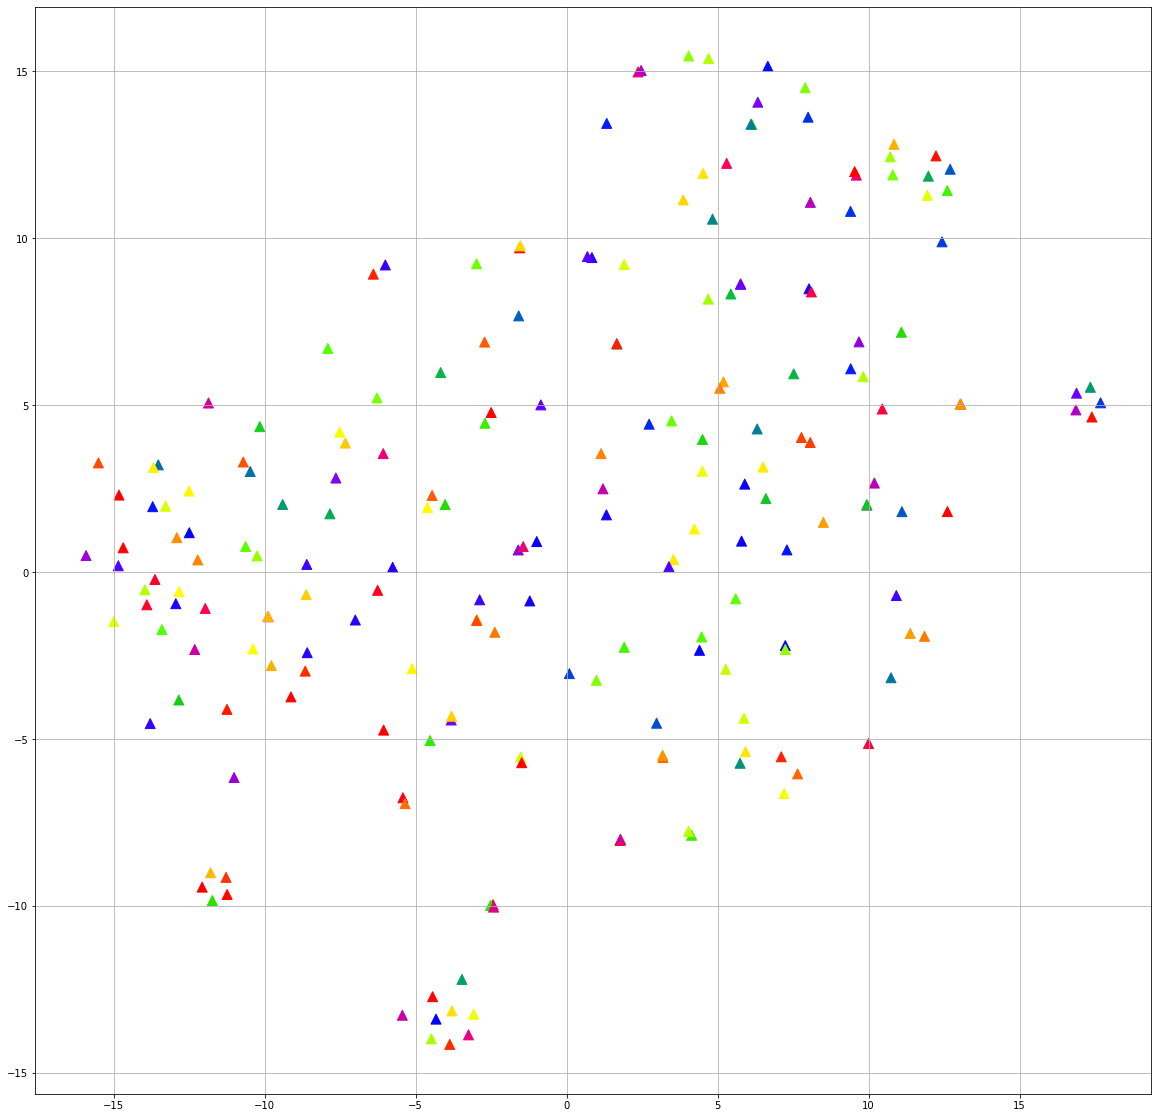

In [87]:
figure(figsize=(20, 20))
scatter(W_e[:, 0], W_e[:, 1], c=colors, cmap=cm.prism, marker='^', s=100)
#for i, c in enumerate(colors):
#    annotate(str(c), (tsne_embed_features[i, 0], tsne_embed_features[i, 1]))
grid()

#### Clustering map for training and validation data

In [96]:
from matplotlib.patches import Rectangle
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

def plot_colortable(colors, title, sort_colors=True, emptycols=0):

    cell_width = 212
    cell_height = 22
    swatch_width = 48
    margin = 12
    topmargin = 40

    # Sort colors by hue, saturation, value and name.
    if sort_colors is True:
        by_hsv = sorted((tuple(mcolors.rgb_to_hsv(mcolors.to_rgb(color))),
                         name)
                        for name, color in colors.items())
        names = [name for hsv, name in by_hsv]
    else:
        names = list(colors)

    n = len(names)
    ncols = 4 - emptycols
    nrows = n // ncols + int(n % ncols > 0)

    width = cell_width * 4 + 2 * margin
    height = cell_height * nrows + margin + topmargin
    dpi = 72

    fig, ax = plt.subplots(figsize=(width / dpi, height / dpi), dpi=dpi)
    fig.subplots_adjust(margin/width, margin/height,
                        (width-margin)/width, (height-topmargin)/height)
    ax.set_xlim(0, cell_width * 4)
    ax.set_ylim(cell_height * (nrows-0.5), -cell_height/2.)
    ax.yaxis.set_visible(False)
    ax.xaxis.set_visible(False)
    ax.set_axis_off()
    ax.set_title(title, fontsize=24, loc="left", pad=10)

    for i, name in enumerate(names):
        row = i % nrows
        col = i // nrows
        y = row * cell_height

        swatch_start_x = cell_width * col
        text_pos_x = cell_width * col + swatch_width + 7

        ax.text(text_pos_x, y, name, fontsize=8,
                horizontalalignment='left',
                verticalalignment='center')

        ax.add_patch(
            Rectangle(xy=(swatch_start_x, y-9), width=swatch_width,
                      height=18, facecolor=colors[name], edgecolor='0.7')
        )

    return fig

In [97]:
len(mcolors.XKCD_COLORS)

949

In [98]:
colors = mcolors.XKCD_COLORS
color_items = colors.items()

In [101]:
color_items = list(color_items)

In [102]:
cls_colors = [color_items[i][1] for i in range(0, len(color_items), 4)]
cls_colors = cls_colors[:207]

In [103]:
moa_names = ['none'] + moa_names

In [107]:
moa_name_colors = dict((name, color) for name, color in zip(moa_names, cls_colors))

#### Clustering for training data

In [109]:
input_df = pd.read_csv(os.path.join(raw_data_path, 'train_features.csv'))
input_df.cp_type = input_df.cp_type.astype('category')
input_df.cp_type = input_df.cp_type.cat.rename_categories(range(len(input_df.cp_type.cat.categories)))
input_df.cp_time = input_df.cp_time.astype('category')
input_df.cp_time = input_df.cp_time.cat.rename_categories(range(len(input_df.cp_time.cat.categories)))
input_df.cp_dose = input_df.cp_dose.astype('category')
input_df.cp_dose = input_df.cp_dose.cat.rename_categories(range(len(input_df.cp_dose.cat.categories)))

# Remove samples of ctl_vehicle.
valid_indexes = input_df.cp_type == 1
input_df = input_df[valid_indexes]
input_df = input_df.reset_index(drop=True)

target_scored_df = pd.read_csv(os.path.join(raw_data_path, 'train_targets_scored.csv'))
target_scored_df = target_scored_df[valid_indexes]
target_scored_df = target_scored_df.reset_index(drop=True)
del target_scored_df['sig_id']
target_scored_df.columns = range(len(target_scored_df.columns))
n_target_samples = target_scored_df.sum().values

if model.conf['data_aug']:
    genes = [col for col in input_df.columns if col.startswith("g-")]
    cells = [col for col in input_df.columns if col.startswith("c-")]

    features = genes + cells
    targets = [col for col in target_scored_df if col != 'sig_id']

    aug_trains = []
    aug_targets = []
    for t in [0, 1, 2]:
        for d in [0, 1]:
            for _ in range(3):
                train1 = input_df.loc[(input_df['cp_time'] == t) & (input_df['cp_dose'] == d)]
                target1 = target_scored_df.loc[(input_df['cp_time'] == t) & (input_df['cp_dose'] == d)]
                ctl1 = input_df.loc[(input_df['cp_time'] == t) & (input_df['cp_dose'] == d)].sample(
                    train1.shape[0], replace=True)
                ctl2 = input_df.loc[(input_df['cp_time'] == t) & (input_df['cp_dose'] == d)].sample(
                    train1.shape[0], replace=True)
                train1[genes + cells] = train1[genes + cells].values + ctl1[genes + cells].values - ctl2[
                    genes + cells].values
                aug_trains.append(train1)
                aug_targets.append(target1)

    input_df = pd.concat(aug_trains).reset_index(drop=True)
    target_scored_df = pd.concat(aug_targets).reset_index(drop=True)

g_feature_names = ['g-' + str(v) for v in range(model.nn_arch['d_gene_exp'])]
c_feature_names = ['c-' + str(v) for v in range(model.nn_arch['d_cell_type'])]
moa_names = [v for v in range(model.nn_arch['num_moa_annotation'])]


def get_series_from_input(idxes):
    idxes = idxes.numpy()
    df = input_df.iloc[idxes]
    
    # Treatment.
    cp_time = df['cp_time']
    cp_dose = df['cp_dose']

    treatment_type = cp_time * 2 + cp_dose

    # Gene expression.
    gene_exps = df[g_feature_names].values

    # Cell viability.
    cell_vs = df[c_feature_names].values

    return treatment_type, gene_exps, cell_vs


def make_input_features(idx):
    treatment_type, gene_exps, cell_vs = tf.py_function(get_series_from_input, inp=[idx], Tout=[tf.int32, tf.float64, tf.float64])
    return treatment_type, gene_exps, cell_vs


MoA_p_sets = []
train_index = []
val_index = []
for col in target_scored_df.columns:
    s = target_scored_df.iloc[:, col]
    s = s[s == 1]
    s = list(s.index)
    n_val = int(n_target_samples[col] * model.conf['val_ratio'])

    if n_val != 0:
        tr_set = s[:int(-1.0 * n_val)]
        val_set = s[int(-1.0 * n_val):]
        MoA_p_sets.append(tr_set)
        train_index += tr_set
        val_index += val_set
    else:
        MoA_p_sets.append(s)
        train_index += s

# Training dataset.
tr_dataset = tf.data.Dataset.from_tensor_slices(train_index)
tr_dataset = tr_dataset.map(make_input_features) #, num_parallel_calls=tf.data.experimental.AUTOTUNE)

tr_iter = tr_dataset.as_numpy_iterator()

# Validation dataset.
val_dataset = tf.data.Dataset.from_tensor_slices(val_index)
val_dataset = val_dataset.map(make_input_features) #, num_parallel_calls=tf.data.experimental.AUTOTUNE)

val_iter = val_dataset.as_numpy_iterator()

In [118]:
tr_iter = tr_dataset.as_numpy_iterator()
moap = model.model.get_layer('moap')
embed_feature_dicts = []
target_df = target_scored_df.loc[train_index]

for i, d in tqdm(enumerate(tr_iter)):
    t, g, c = d
    t = np.expand_dims(t, axis=0)
    g = np.expand_dims(g, axis=0)
    c = np.expand_dims(c, axis=0)

    # First layers.
    t = moap.embed_treatment_type_0(t)
    t = tf.reshape(t, (-1, model.nn_arch['d_input_feature']))
    t = moap.dense_treatment_type_0(t)

    t = moap.layer_normalization_0_1(t)
    g = moap.layer_normalization_0_2(g)
    c = moap.layer_normalization_0_3(c)

    # Gene expression.
    g_e = moap.encoder_gene_exp_1(g)
    x_g = moap.decoder_gene_exp_1(g_e)
    x_g = tf.expand_dims(x_g, axis=-1)
    x_g = tf.squeeze(x_g, axis=-1)

    # Cell type.
    c_e = moap.encoder_cell_type_2(c)
    x_c = moap.decoder_cell_type_2(c_e)
    x_c = moap.dropout_2(x_c)

    # Skip-connection autoencoder and final layers.
    x = tf.concat([t, g_e, c_e], axis=-1)
    for k in range(model.nn_arch['num_sc_ae']):
        x = moap.sc_aes[k](x)

    # Final layers.
    x = moap.dense_4_1(x)
    x = moap.dense_4_2(x)
    x = moap.dense_4_3(x)

    # Normalize x.
    if conf['loss_type'] == LOSS_TYPE_MULTI_LABEL:
        x1 = moap.dense_4_4(x)
    elif conf['loss_type'] == LOSS_TYPE_ADDITIVE_ANGULAR_MARGIN:
        x = x / tf.sqrt(tf.reduce_sum(tf.square(x), axis=1, keepdims=True))
        x1 = moap.dense_4_4(x)
    else:
        raise ValueError('loss type is not valid.')
    
    # Get embed_feature_dict.
    embed_feature_dict = {}
    embed_feature_dict['sig_id'] = -1
    embed_feature_dict['embed_feature'] = x.numpy().ravel()
    series = target_df.iloc[i]
    df = series[series == 1].to_frame()
    embed_feature_dict['MoA_classes'] = list(df.index)
    
    embed_feature_dicts.append(embed_feature_dict)

15255it [06:02, 42.06it/s]


In [120]:
embed_features = np.array([v['embed_feature'] for v in embed_feature_dicts])
tsne_embed_features = TSNE(n_components=2).fit_transform(embed_features)
classes = [v['MoA_classes'] for v in embed_feature_dicts]
for i in tqdm(range(len(classes))):
    if len(classes[i]) == 0:
        classes[i] = [0]
colors = [v[0] for v in classes]

100%|██████████| 15255/15255 [00:00<00:00, 643133.92it/s]


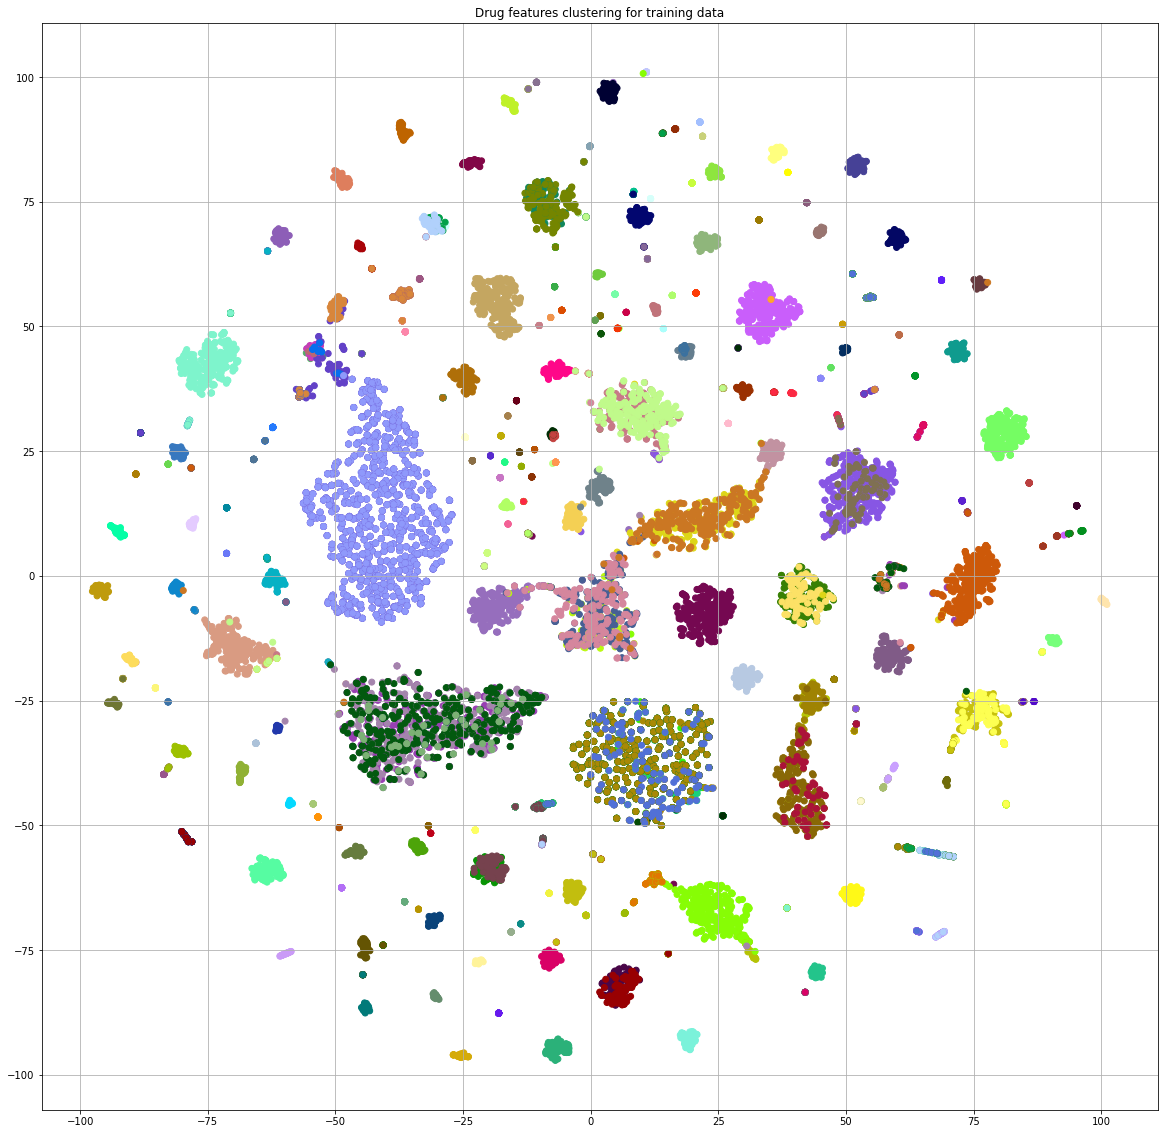

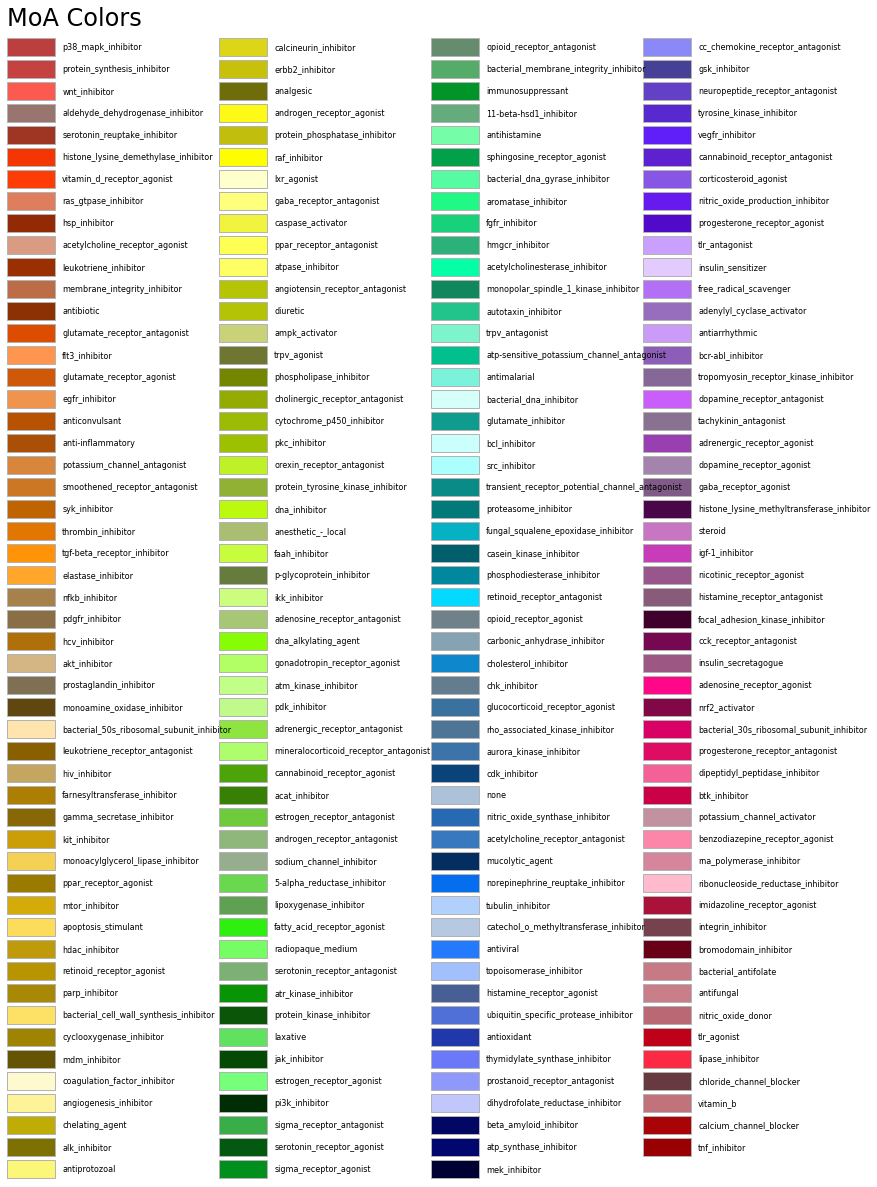

In [121]:
figure(figsize=(20, 20))
x = []
y = []
c = []

for i in range(len(tsne_embed_features)):
    for v in classes[i]:
        x.append(tsne_embed_features[i, 0])
        y.append(tsne_embed_features[i, 1])
        c.append(cls_colors[v])

scatter(x, y, c=c, alpha=1.0)
title('Drug features clustering for training data')
grid()
moa_name_colors_fig = plot_colortable(moa_name_colors, "MoA Colors")


#### Clustering for validation data

In [122]:
val_iter = val_dataset.as_numpy_iterator()
moap = model.model.get_layer('moap')
embed_feature_dicts = []
target_df = target_scored_df.loc[val_index]

for i, d in tqdm(enumerate(val_iter)):
    t, g, c = d
    id_ = input_df['sig_id'].iloc[i]
    t = np.expand_dims(t, axis=0)
    g = np.expand_dims(g, axis=0)
    c = np.expand_dims(c, axis=0)

    # First layers.
    t = moap.embed_treatment_type_0(t)
    t = tf.reshape(t, (-1, model.nn_arch['d_input_feature']))
    t = moap.dense_treatment_type_0(t)

    t = moap.layer_normalization_0_1(t)
    g = moap.layer_normalization_0_2(g)
    c = moap.layer_normalization_0_3(c)

    # Gene expression.
    g_e = moap.encoder_gene_exp_1(g)
    x_g = moap.decoder_gene_exp_1(g_e)
    x_g = tf.expand_dims(x_g, axis=-1)
    x_g = tf.squeeze(x_g, axis=-1)

    # Cell type.
    c_e = moap.encoder_cell_type_2(c)
    x_c = moap.decoder_cell_type_2(c_e)
    x_c = moap.dropout_2(x_c)

    # Skip-connection autoencoder and final layers.
    x = tf.concat([t, g_e, c_e], axis=-1)
    for i in range(model.nn_arch['num_sc_ae']):
        x = moap.sc_aes[i](x)

    # Final layers.
    x = moap.dense_4_1(x)
    x = moap.dense_4_2(x)
    x = moap.dense_4_3(x)

    # Normalize x.
    if conf['loss_type'] == LOSS_TYPE_MULTI_LABEL:
        x1 = moap.dense_4_4(x)
    elif conf['loss_type'] == LOSS_TYPE_ADDITIVE_ANGULAR_MARGIN:
        x = x / tf.sqrt(tf.reduce_sum(tf.square(x), axis=1, keepdims=True))
        x1 = moap.dense_4_4(x)
    else:
        raise ValueError('loss type is not valid.')
    
    # Get embed_feature_dict.
    embed_feature_dict = {}
    embed_feature_dict['sig_id'] = id_
    embed_feature_dict['embed_feature'] = x.numpy().ravel()
    series = target_df.iloc[i]
    df = series[series == 1].to_frame()
    embed_feature_dict['MoA_classes'] = list(df.index)
    
    embed_feature_dicts.append(embed_feature_dict)

1589it [00:38, 41.60it/s]


In [123]:
embed_features = np.array([v['embed_feature'] for v in embed_feature_dicts])
tsne_embed_features = TSNE(n_components=2).fit_transform(embed_features)
classes = [v['MoA_classes'] for v in embed_feature_dicts]
for i in tqdm(range(len(classes))):
    if len(classes[i]) == 0:
        classes[i] = [0]
colors = [v[0] for v in classes]

100%|██████████| 1589/1589 [00:00<00:00, 295109.33it/s]


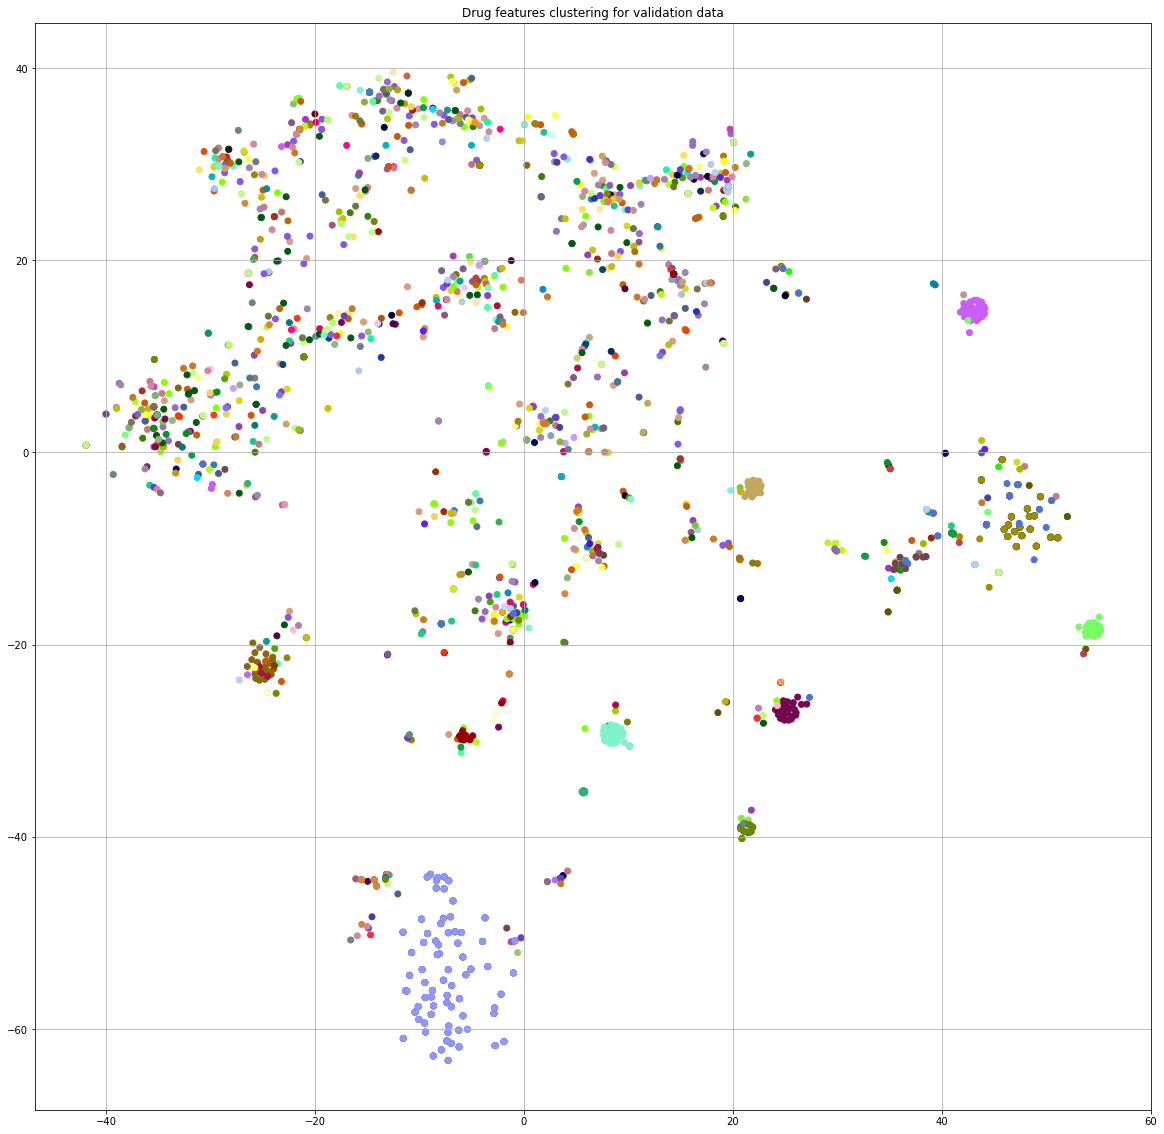

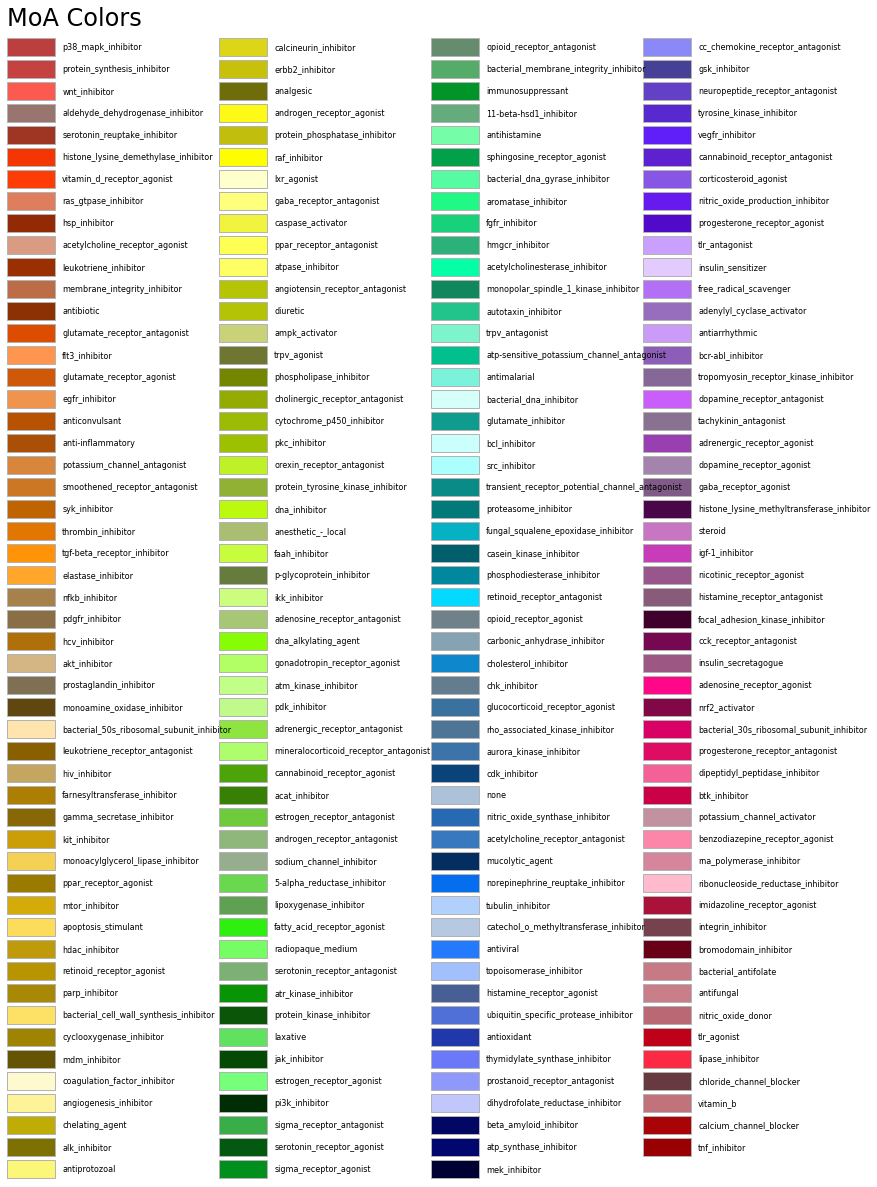

In [124]:
figure(figsize=(20, 20))

x = []
y = []
c = []

for i in range(len(tsne_embed_features)):
    for v in classes[i]:
        x.append(tsne_embed_features[i, 0])
        y.append(tsne_embed_features[i, 1])
        c.append(cls_colors[v])
      
scatter(x, y, c=c, alpha=1.0)
title('Drug features clustering for validation data')
grid()

moa_name_colors_fig = plot_colortable(moa_name_colors, "MoA Colors")